In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

In [2]:
# sns.set_style('darkgrid') # 设置图的显示风格：'darkgrid'——图的底板颜色为黑色

In [3]:
import sys

print(sys.version)
print(np.__version__)
print(pd.__version__)

3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 12:30:02) [MSC v.1900 64 bit (AMD64)]
1.13.1
0.20.3


# （一）数据加载

In [4]:
# './kaggle/train.csv'：表示当前工作目录下的 kaggle 文件夹内的 train.csv 文件
# '../'：表示上层工作目录下；
train = pd.read_csv('./kaggle/train.csv')
test = pd.read_csv('./kaggle/test.csv')
all_data = pd.concat([train.loc[:, 'MSSubClass':'SaleCondition'],
                    test.loc[:, 'MSSubClass':'SaleCondition']])# 'MSSubClass'是第一列，'SaleCondition'，是最后一列；连接后，行数增加；  
all_data = all_data.reset_index(drop=True)

In [5]:
train.head()# 查看 train 数据集的前 5 行信息；

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### DataFrame 中 read_csv() 读取数据时，对 NA 的处理：
    pd.read_csv(file, na_values=None, keep_default_na=True,..)
        1、na_values=[]：指定缺失值类型
        2、默认的的缺失数据类型：''、#N/A N/a、#NA、-1.#IND、-1.#QNAN、-NAN、-nan、1.#IND、1.#QNAN、N/A、NA、NULL、NaN、nan
        3、keep_default_na=True：所有 na_values 指定的缺失值类型都解析为 np.NAN（float 型）；
        4、keep_defaut_na=False
            a）na_values=[..]指定数据：将指定的数据解析为 np.NaN
            b）na_values=None 不指定数据：保留默认数据的字符串类型，其它的解析为 np.NaN；

In [6]:
print(train.shape, test.shape, all_data.shape)# all_data 中少了 Id 和 SalePrice 两列

(1460, 81) (1459, 80) (2919, 79)


### 1、基础统计

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2、特征分类（网络搜索简单了解，后续详细学习）

    从两个维度分类：（数值量、字符量）、（连续性、离散型）
    
    int & float：数值量
    object：字符量

In [8]:
# 数值量特征
feats_numeric = all_data.dtypes[all_data.dtypes != 'object'].index.values
# feats_numeric = [attr for attr in all_data.columns in all_data.dtypes[attr] != 'boject']


# 字符量特征
feats_object = all_data.dtypes[all_data.dtypes == 'object'].index.values
# feats_object = [attr for attr in all_data.columns if all_data.dtypes[attr] == 'object']
# feats_object = train.select_dtypes(include = ['object']).columns

print(feats_numeric.shape, feats_object.shape)

(36,) (43,)


### 总共79个特征，pandas 自动识别的 36 个数字值，43个字符量

In [30]:
# 1）离散的数值量特征，需要人工甄别
feats_numeric_discrete = ['MSSubClass', 'OverallQual', 'OverallCond']#户型、整体质量打分、整体条件打分 -- 文档中明确定义的类型量
feats_numeric_discrete += ['TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'GarageCars', 'Fireplaces']# 房间数量
feats_numeric_discrete += ['FullBath', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath']# 浴室
feats_numeric_discrete += ['MoSold', 'YrSold']# 年份、月份，看成离散型特征


# 2）连续型特征
feats_continu = feats_numeric.copy()

# 3）离散型特征
feats_discrete = feats_object.copy()

for f in feats_numeric_discrete:
    feats_continu = np.delete(feats_continu, np.where(feats_continu == f))
    feats_discrete = np.append(feats_discrete, f)
    
print(feats_continu.shape, feats_discrete.shape)

(22,) (57,)


### 3、基本分布（scatter）

In [31]:
def plotfeats(frame,feats,kind,cols=4):
    """同用批量绘图函数：查看每种特征与房价的相关性，可以根据参数 kind 的取值，绘制不同类型的图；
    frame : pandas.DataFrame，待绘图的数据集；（包含特征及其特征值）
    
    feats : list 或 numpy.array，待绘图的列名称数据；（此处只 frame 数据集中的列名，也即是特征的名称，list 类型）
    
    kind : str，绘图格式
        'hist'-直方图；
        'scatter'：散点图；
        'hs'：直方图和散点图隔行交；
        'box'：箱形图，每个feat一幅图；
        'boxp'：Price 做纵轴，feat做横轴的盒图。
    
    cols : int，每行绘制几幅图（这里自定义每行多少个图）
    rows：一共有几行图
    """
    # 1）先处理画板的问题：根据绘制的图形类别
    rows = int(np.ceil((len(feats))/cols))
    if rows == 1 and len(feats)<cols:
        cols = len(feats)
    #print("输入%d个特征，分%d行、%d列绘图" % (len(feats), rows, cols))
    if kind == 'hs': #hs:hist and scatter
        # fig：实例的画板；
        # axes：将实例画板分割成 rows 行 cols 列后的空画板；
        fig, axes = plt.subplots(nrows=rows*2,ncols=cols,figsize=(cols*5,rows*10))# 每行绘图数（也即是列数）不变，行数加倍
    else:
        fig, axes = plt.subplots(nrows=rows,ncols=cols,figsize=(cols*5,rows*5))
        if rows==1 and cols==1:
            axes = np.array([axes])
        axes = axes.reshape(rows,cols) # 当 rows=1 时，axes.shape:(cols,)，需要reshape一下
        
    # 2）开始绘图
    i=0
    for f in feats:
        #print(int(i/cols),i%cols)
        if kind == 'hist':
            #frame.hist(f,bins=100,ax=axes[int(i/cols),i%cols])
            frame.plot.hist(y=f,bins=100,ax=axes[int(i/cols),i%cols])
        elif kind == 'scatter':
            frame.plot.scatter(x=f,y='SalePrice',ylim=(0,800000), ax=axes[int(i/cols),i%cols])
        elif kind == 'hs':
            frame.plot.hist(y=f,bins=100,ax=axes[int(i/cols)*2,i%cols])
            frame.plot.scatter(x=f,y='SalePrice',ylim=(0,800000), ax=axes[int(i/cols)*2+1,i%cols])
        elif kind == 'box':
            frame.plot.box(y=f,ax=axes[int(i/cols),i%cols])
        elif kind == 'boxp':
            sns.boxplot(x=f,y='SalePrice', data=frame, ax=axes[int(i/cols),i%cols])
        i += 1
    plt.show()

#### 分析（一）：train 数据集中，连续型特征（feats_continu）与 SalePrice 的关系

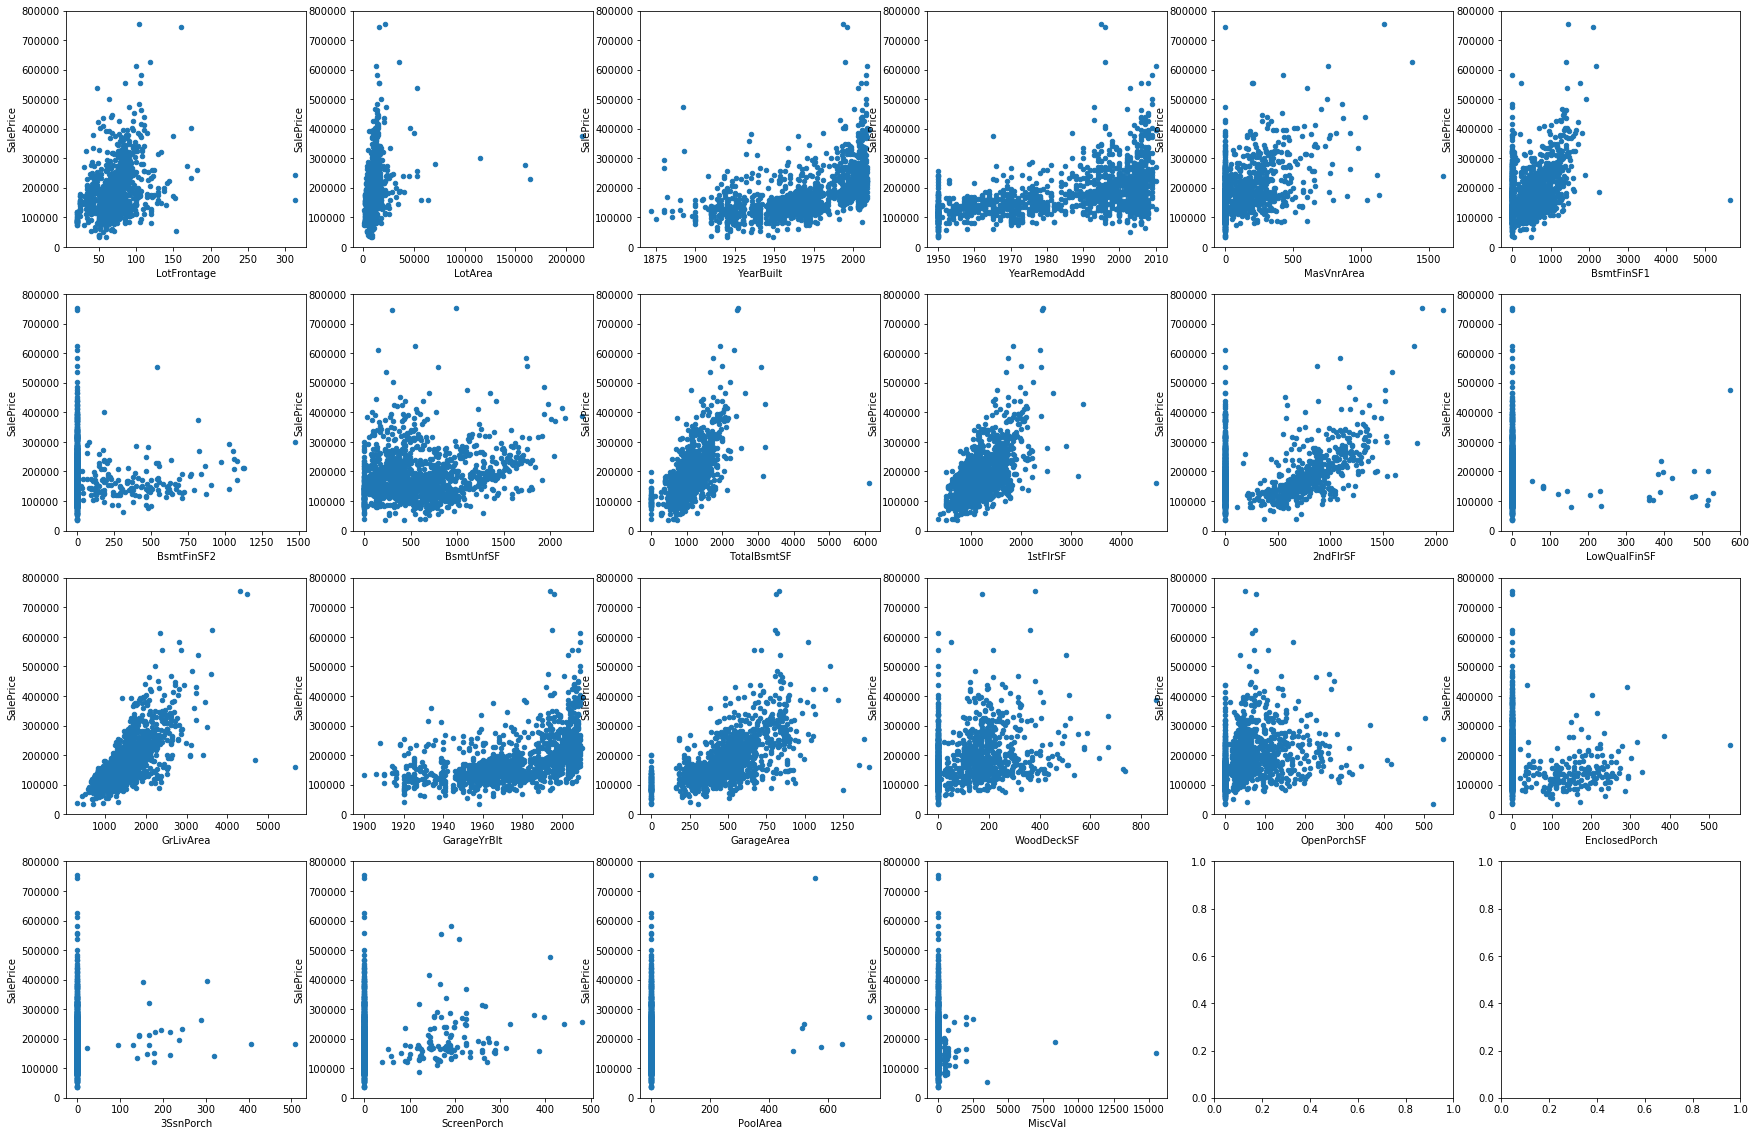

In [32]:
plotfeats(train, feats_continu, kind='scatter', cols=6)

#### 分析上图

In [33]:
# 1）LotFrontage、LotArea、GrLivArea、1stFlrSF、2stFlrSF、GarageArea、BsmtFinSF1、TotalBsmtSF： 这几个特征表示的面积和距离，与售价呈明显正相关趋势
#     LotFrontage：房子到街道的距离，大多在50-100英尺（15-30米），距离远的是不是大多是豪宅？躲在山林深处……
#     LotArea：占地面积（包括房屋、花园、前后院……），均值是10516平方英尺（900+平方米），向往啊……
#     GrLivArea：地面以上整体面积
#     1stFlrSF、2stFlrSF： 第1、 2层建筑面积
#     GarageArea：车库面积
#     BsmtFinSF1、BsmtFinSF2、TotalBsmtSF：地下室面积，很多房子还有第2个地下室
# 2）YearBuilt、YearRemodAdd、GarageYrBlt：从图中可以看出，建造年限对售价虽正相关，但坡度较小，关联度没有上面几个因素大，早点、晚点售价差不多

#### 分析（二）：train 数据集中，离散的数值量特征（feats_numeric_discrete）和房价（SalePrice）的关系

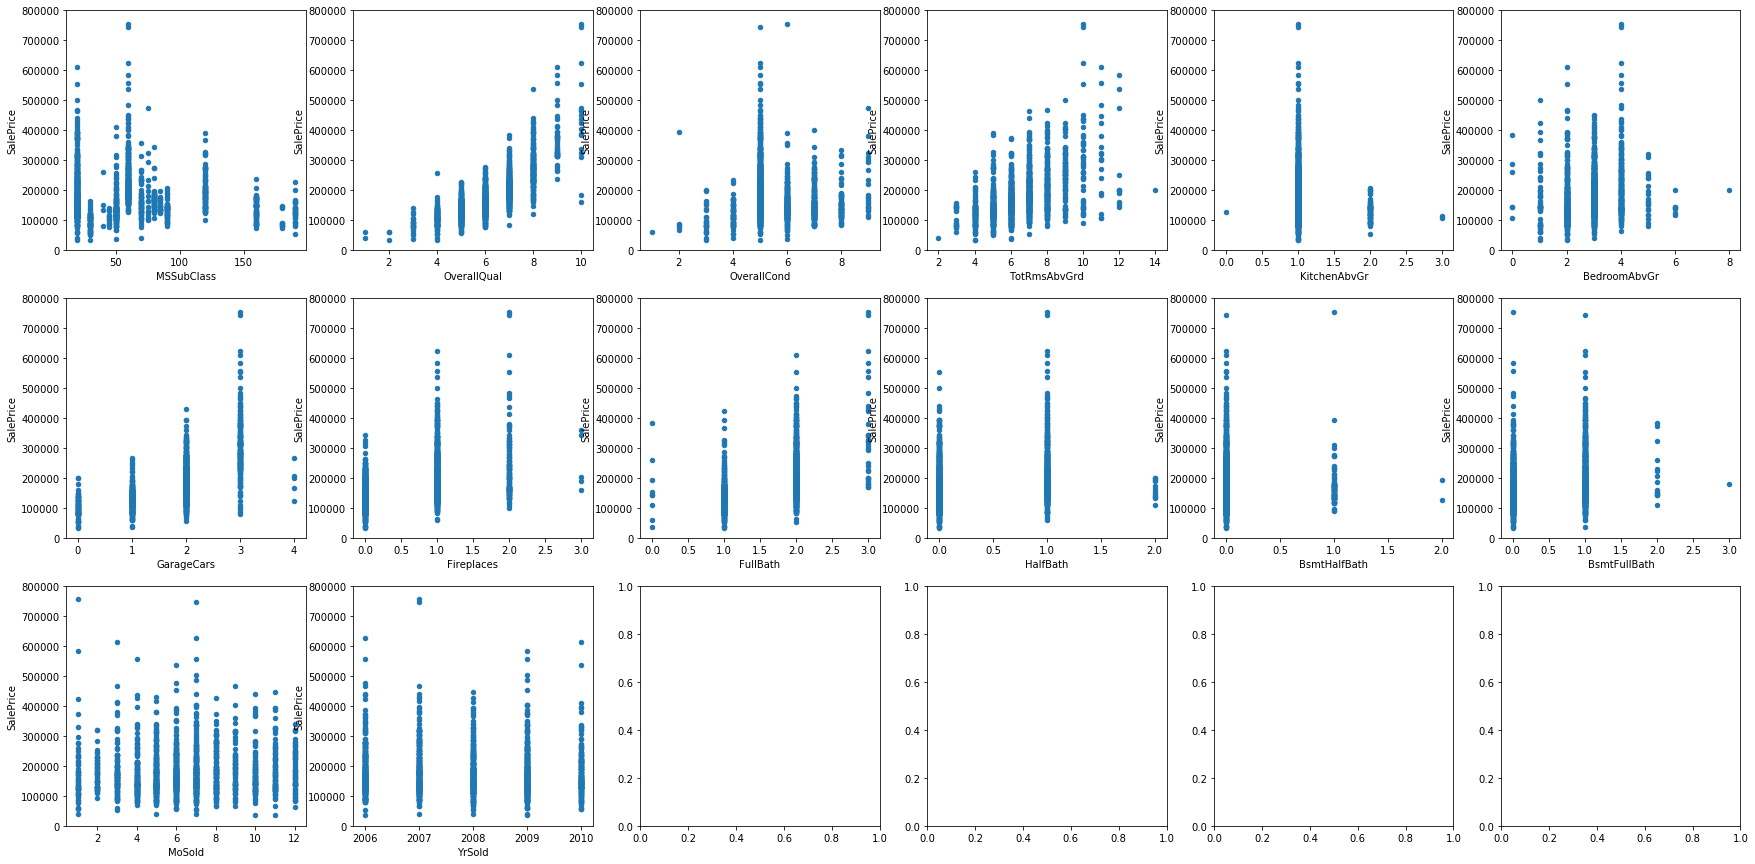

In [34]:
plotfeats(train, feats_numeric_discrete, kind='scatter', cols=6)

#### 分析上图

In [39]:
# 1）MSSubClass：户型，典型的离散型特征，只不过数据提供者已经帮我们数值化了，说明文件中的有详细解释
#     20/30/40: 单层（1-STORY）建筑，英语里楼层是 storey，美国简化为 story
#     45/50:1-1/2 story，应该是带阁楼吧，我猜
#     ……
# 2）OverallQual、OverallCond：房屋材料、新旧度、condition等的整体打分 —— 这个因为是人为打分，有可能存在给售价高的打高分，所以需要持怀疑态度
# 3）TotRmsAbvGrd、GarageCars：房间数量、车库容量，可以看出和售价正相关
# 4）YrSold、MoSold：卖出的年、月，都是06年～10年的数据，只有卖出才有真实售价嘛，这两个特征和售价我觉得是没有关联的，可以考虑删除。
# 5）其他的特征看不出啥明显趋势

# （二）数据分析

### 目的：挖掘数据中隐藏的信息，为数据处理做准备
        * 找出异常的特征数据、无效的特征

### 主要内容：
    1）正态性分析：使用 hist（直方图）和 scatter（散点图）展示
    2）分散度分析：使用 box（箱线图）、boxp（盒图）
    3）方差齐次分析：
    4）方差分析： 使用 bar（柱状图）展示
    5）协方差分析：使用 heatmap（热图）展示

## 1）正态性检验

    常用的方法：
        1）正态概率纸法
        2）夏皮罗维尔克检验法(Shapiro-Wilktest)
        3）科尔莫戈罗夫检验法
        4）偏度-峰度检验法等 —— 下文使用

### 采用 “偏度 - 峰度”检测法
    目的：查看每种特征数据的偏度和峰度，判断特征数据中是否出现异常的特征值；

#### 1、偏离度分析（hist | scatter）
    1）偏度：统计数据分布非对称程度的数字特征。
        **注：一组数据的偏度及峰度越大，该组数据的分布越不对称；
    2）表征概率分布密度曲线相对于平均值不对称程度的特征数
    3）偏离度是某一特征（即：某一列）自己的特性，不同于相关性（某两列之间）特性
    
    思想：一组随机离散的数据，默认其分布是对称的；
    方法：假设特征数据是随机离散的，如果改组特征数据的分布不对称，则判断改组特征数据中可能出现了异常值；
    
    疑问：每种特征都有其存在的实际意义，这种实际意义就是一种规律，特征数据是按照其存在的实际意义进行分布的，可以看做是随机离散的吗？

In [43]:
# train 数据中的 SalePrice 的偏离度
train.skew()['SalePrice']

1.8828757597682129

(array([  5.,   0.,   5.,   6.,   6.,   7.,  32.,  29.,  23.,  35.,  59.,
         67.,  73.,  92.,  89.,  91.,  62.,  60.,  57.,  73.,  67.,  54.,
         45.,  33.,  30.,  31.,  31.,  33.,  26.,  23.,  17.,  19.,  18.,
         18.,  14.,  11.,   5.,   8.,  13.,  12.,  10.,   6.,   6.,   5.,
          1.,   3.,   5.,   6.,   5.,   4.,   3.,   2.,   3.,   1.,   3.,
          1.,   2.,   2.,   0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([  34900.,   42101.,   49302.,   56503.,   63704.,   70905.,
          78106.,   85307.,   92508.,   99709.,  106910.,  114111.,
         121312.,  128513.,  135714.,  142915.,  150116.,  157317.,
         164518.,  171719.,  178920.,  186121.,  193322.,  200523.,
         207724.,  214925.,  222126.,  229327.

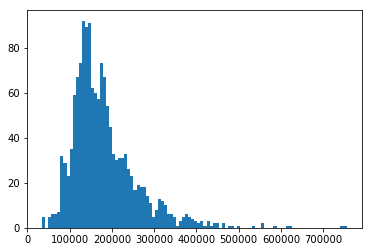

In [45]:
# train.plot(kind='hist', y='SalePrice', bins=100)
# train.plot['SalePrice'].plot(kind='hist', y='SalePrice', bins=100)# 为了和下面的图做对比
# sns.distplot(train['SalePrice'], fit='norm')
plt.hist(train['SalePrice'], bins=100)

#### 分析上图：
    直方图上看房价数据并不堆成，有可能是数据收集的不完整，也有可能数据本身就不对称；

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.164745194154, 180921.19589041095, 0.93196656415129864))

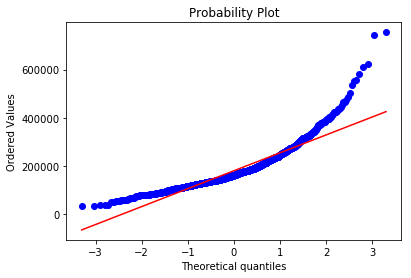

In [48]:
stats.probplot(train['SalePrice'], plot=plt)

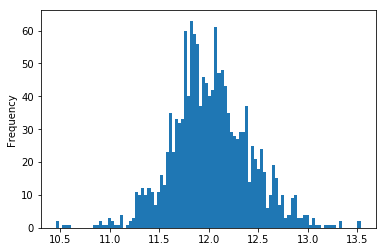

In [50]:
train['SalePrice'].apply(lambda x: np.log(x)).plot(kind='hist', y='SalePrice', bins=100)

In [57]:
# 1）计算各列自己的偏离度
# 此处 x：all_data[feats_numeric] 的每一列；
skewed = all_data[feats_numeric].apply(lambda x : stats.skew(x.dropna())).sort_values(ascending=False)
#skewed = all_data[feats_numeric].skew().sort_values(ascending=False)
skewed[:10]

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
dtype: float64

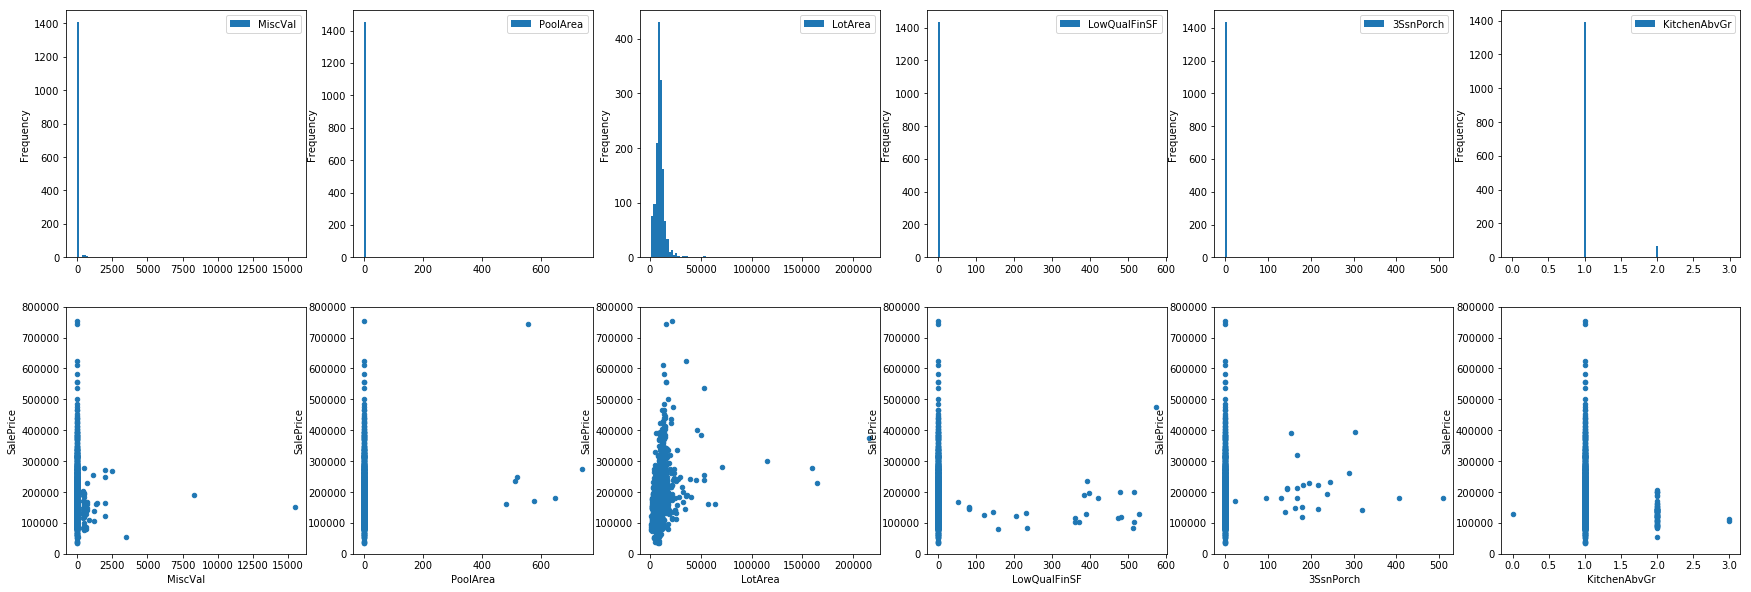

In [58]:
# 2）用直方图和散点图（SalePrice 之间）对比展示偏离度：
    # 此处是对比偏离度最高的 6 种特征与房价（SalePrice）之间的关系

plotfeats(train, skewed[:6].index, kind='hs', cols=6)

#### 2、峰度分析（hist | scatter）

    1）峰度：描述总体中所有取值分布形态陡缓程度的统计量。
          ** 注：这个统计量需要与正态分布相比较；
          A）峰度 == 0：表示该总体数据分布与正态分布的陡缓程度相同；
          B）峰度 > 0：表示该总体数据分布与正态分布相比较为陡峭，为尖顶峰；
          C）峰度 < 0：表示该总体数据分布与正态分布相比较为平坦，为平顶峰。
          D）峰度的绝对值数值越大表示其分布形态的陡缓程度与正态分布的差异程度越大。
    2）kurtosis,peakedness —— 峰度、峰态系数。
    3）表征概率密度分布曲线在平均值处峰值高低的特征数。
    4）峰度是和正态分布相比较而言的统计量，反映了峰部的尖度。
    5）峰度大于三，峰的形状比较尖，比正态分布峰要陡峭。
    6）可用峰度来检验分布的正态性。
    7）在实际应用中，通常将峰度值做减 3 处理，使得正态分布的峰度0。

     思想：峰度（Kurtosis）衡量实数随机变量概率分布的峰态，峰度高就意味着方差的增大是由低频度的大于或小于平均值的极端差值引起的。
      方法：一组特征数据的峰度偏高高，说明该组特征数据中出现了数量较少的大于或小于平均值的极端数据；

In [60]:
train.kurt()['SalePrice']

6.5362818600645287

In [61]:
# 1）计算各列自己的峰度

kurted = all_data[feats_numeric].kurt().sort_values(ascending=False)
kurted[:10]

MiscVal          564.074582
PoolArea         298.633144
LotArea          264.952310
LowQualFinSF     174.932812
3SsnPorch        149.409834
EnclosedPorch     28.377909
KitchenAbvGr      19.777937
BsmtFinSF2        18.836540
ScreenPorch       17.776704
BsmtHalfBath      14.848079
dtype: float64

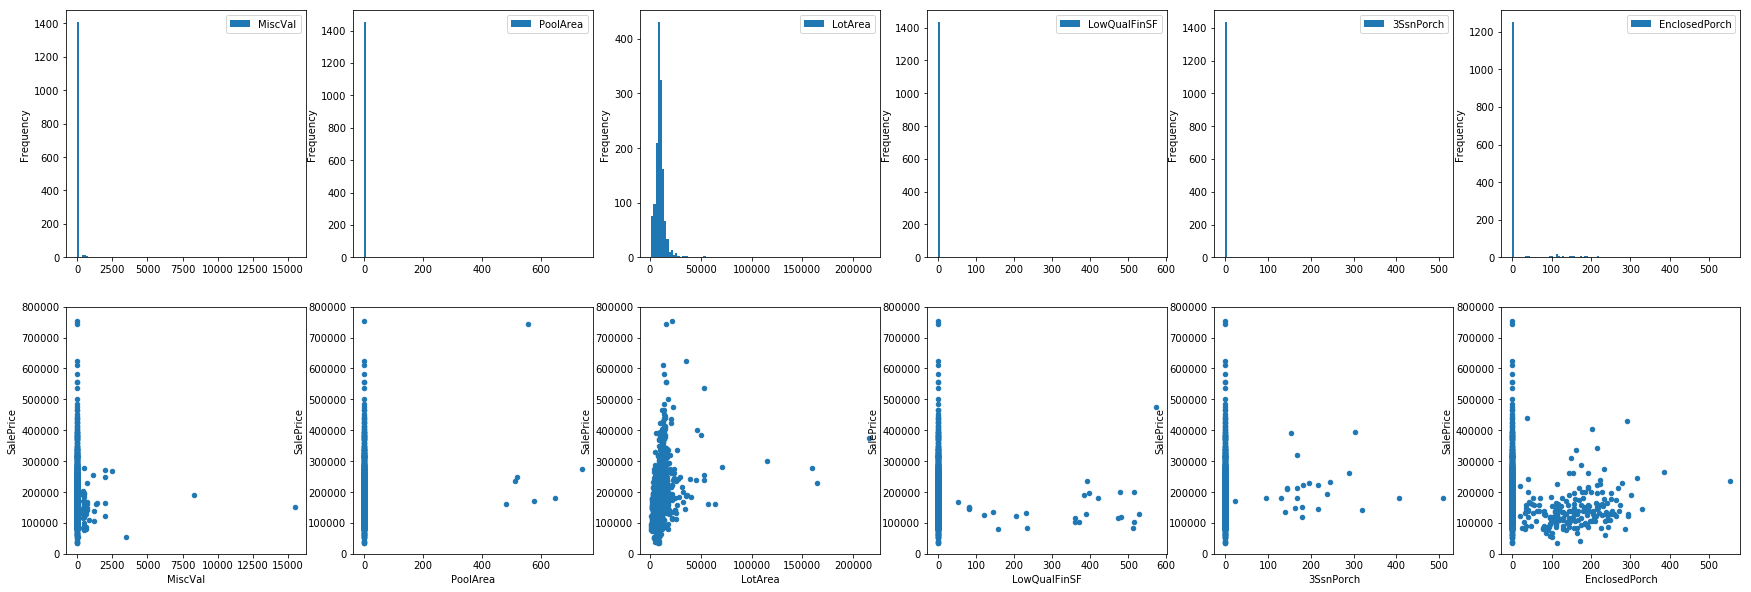

In [62]:
# 2）用直方图和散点图（SalePrice 之间）对比展示峰度：
    # 此处对比峰度最高的 6 中特征与房价（SalePrice）之间的关系

plotfeats(train, kurted[:6].index, kind='hs', cols=6)

## 2）分散度分析（box）
    目的：查看异常的特征值；（用于修改样本的异常特征值，或者删除异常样本）
    
    方法：查看每组特征数据的分布情况，找到异常的特征数据；

### 1、numeric 类型特征的分散度

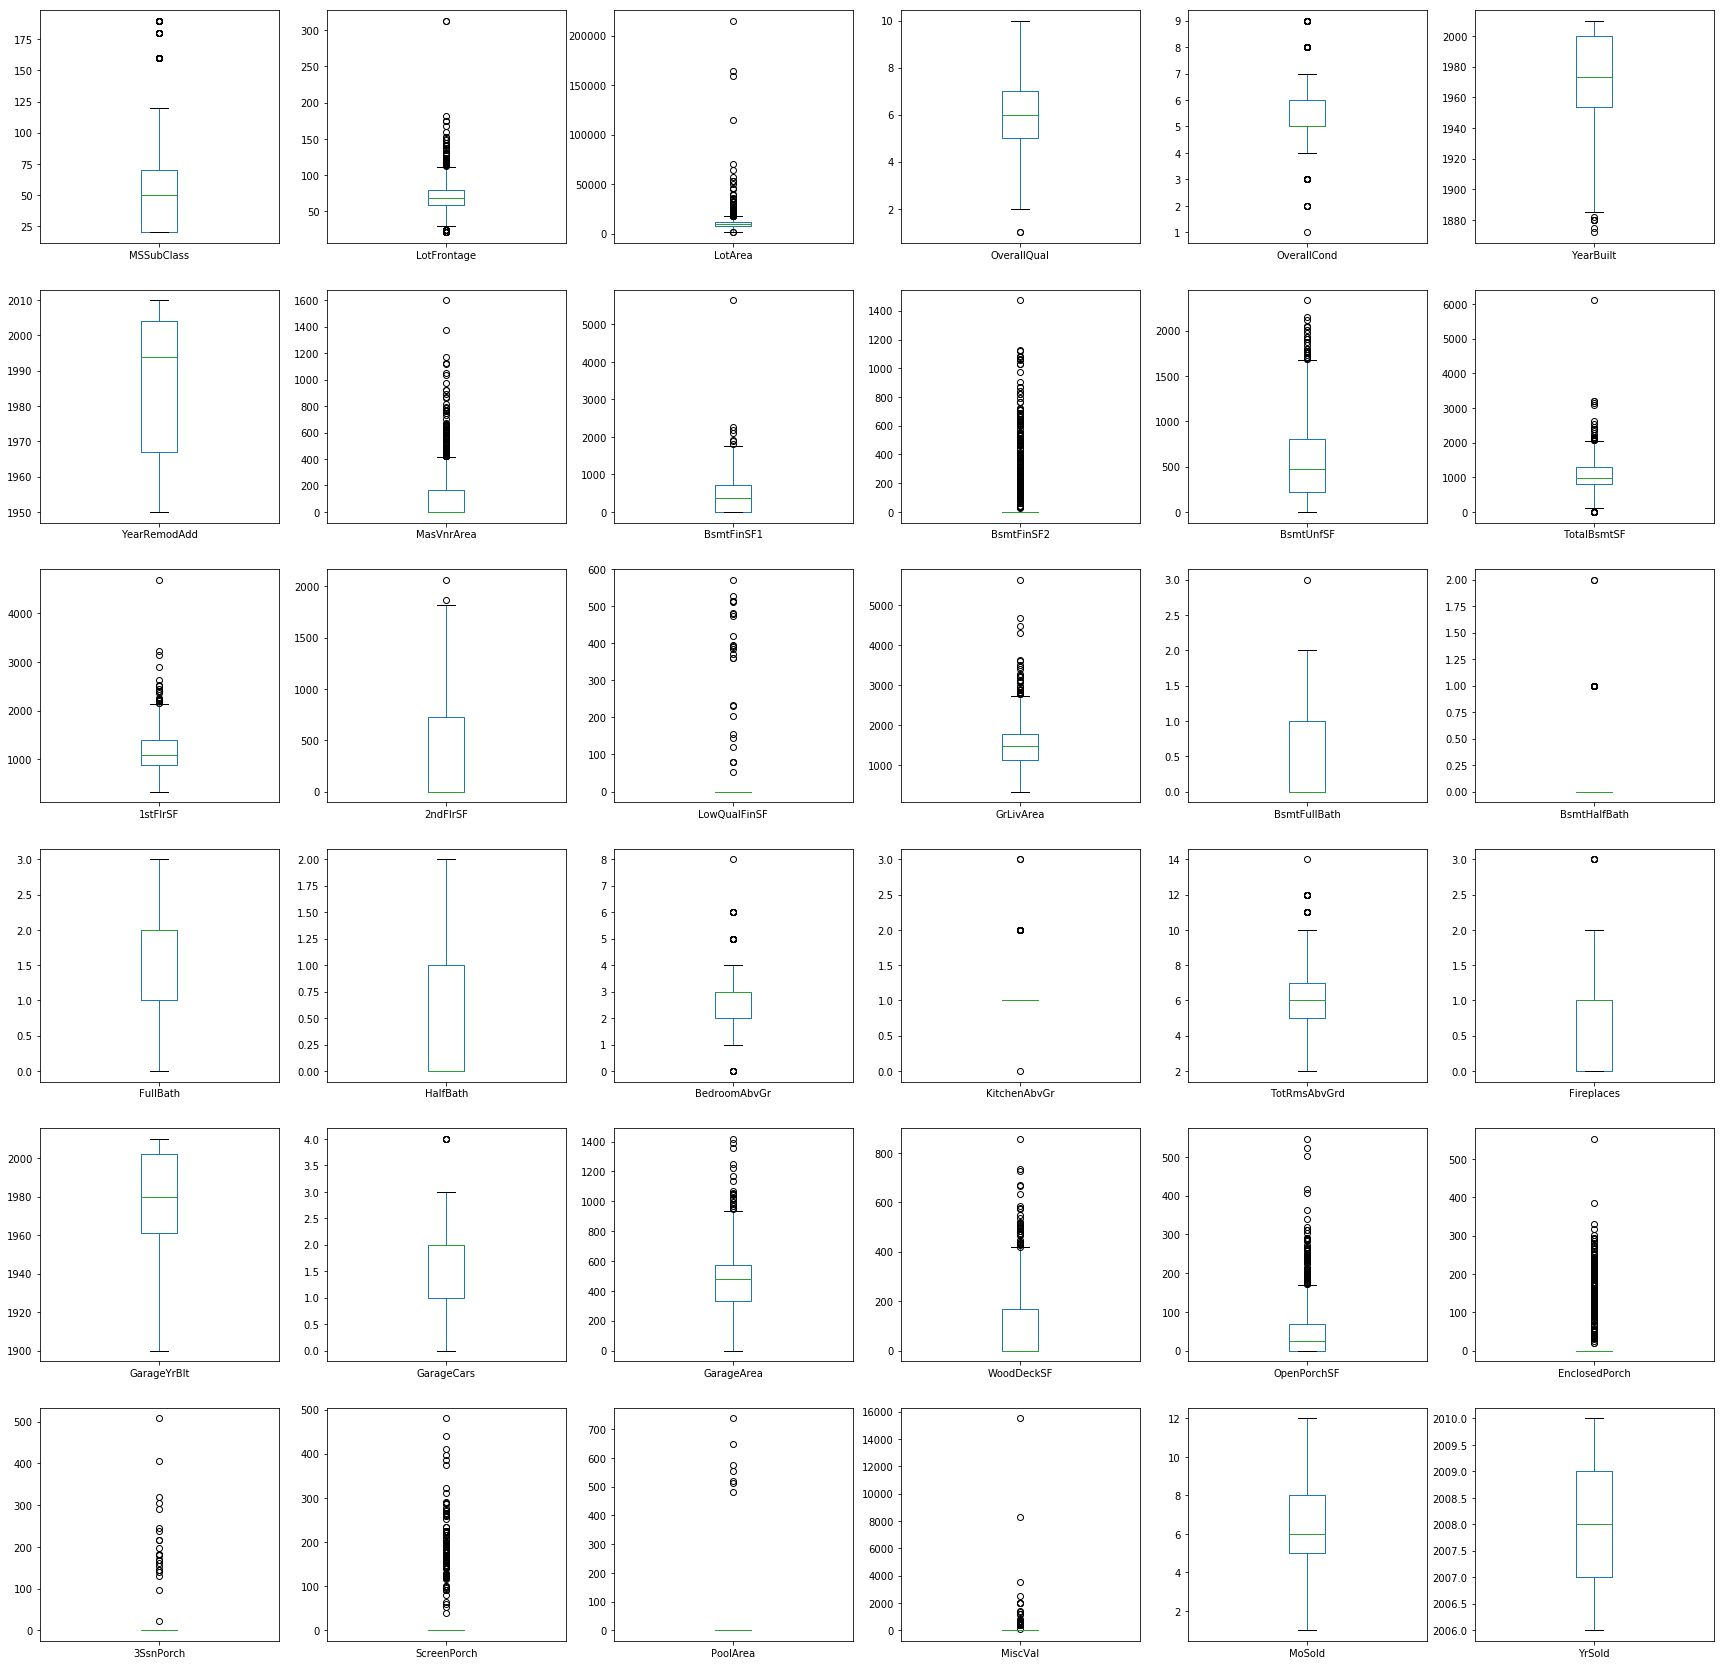

In [75]:
plotfeats(train, feats_numeric, kind='box', cols=6)

### 箱形图：显示一组数据分散情况的统计图；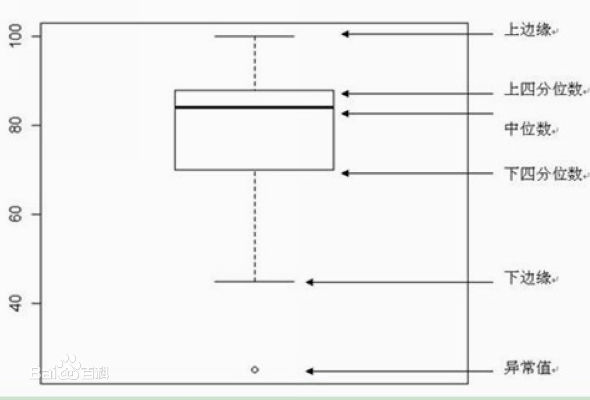
    1）上四分位点：Q3，75% 位置的数据；
    2）下四分位点：Q1，25% 位置的数据；
    3）中位数：Q2,50% 位置的数据；一组数据中间位置的值；
    4）上/下边缘：一组数据的最大值和最小值；
    5）异常值：箱形图上，在 Q3 + 1.5IQR 和 Q1 - 1.5IQR 处画两条线，与中位线一样的线段，两条线段为异常值截断点。
        * 也就是：x > Q3+1.5IQR 或者 x < Q1-1.5IQR，则 x 数值为异常值；
    6）IQR：四分位距，IQR = Q3 - Q1

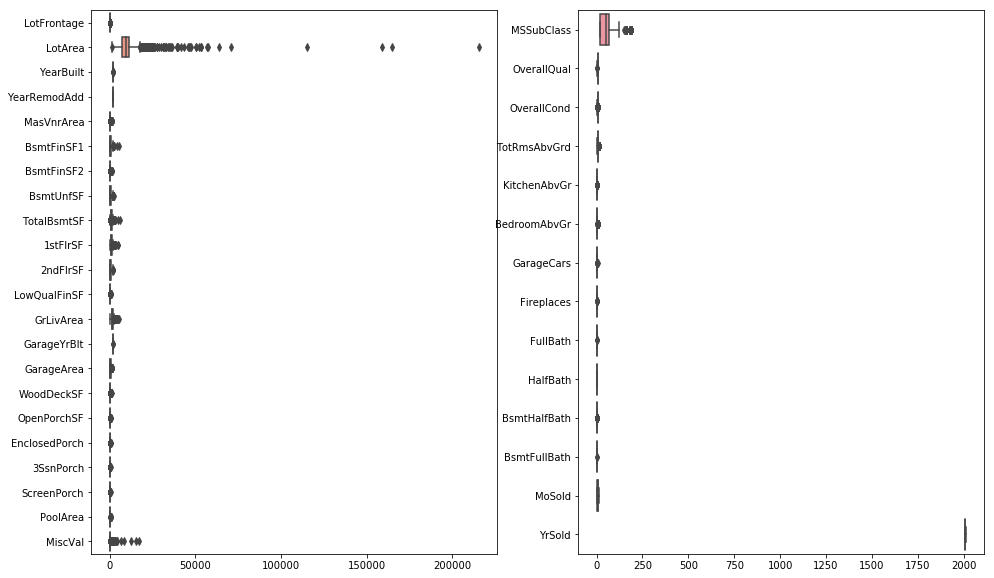

In [69]:
# 由于特征数据没有标准化处理，比例差异巨大；（只有标准化后的数据才可以更好的显示）

plt.figure(figsize=(16, 10))# 创建一个长16、宽10的画板实例

plt.subplot(121)# 将 plt.figure() 创建的画板分割为 1 行、2 列的子图，并开始绘制第一个子图
sns.boxplot(data=all_data[feats_continu], orient='h')

plt.subplot(122)# 开始绘制第二个子图
sns.boxplot(data=all_data[feats_discrete], orient='h')

#### SalePrice 的分散度（盒图：kind='boxp'）
    目的：查询没有意义的特征；（用于删除无效特征）
    
    方法：通过 SalePrice 相对于特征的分布情况，以及房价相对于特征的分布趋势，得到特征与房价的相关性，进而刷选出相关性不强的特征；

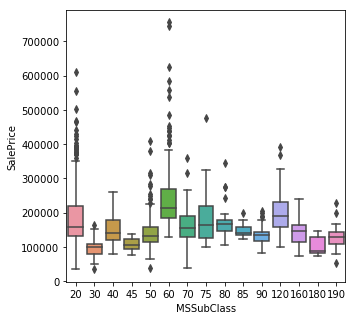

In [172]:
plotfeats(train, ['MSSubClass'], kind='boxp', cols=6)

### 盒图解读：
    横轴为特征数据，纵轴是房价，将特征数据按从大到小排列后等区间划分，查看每个区间的特征数据对应的房价的分布情况；一定程度反映房价相对于特征的分布趋势；

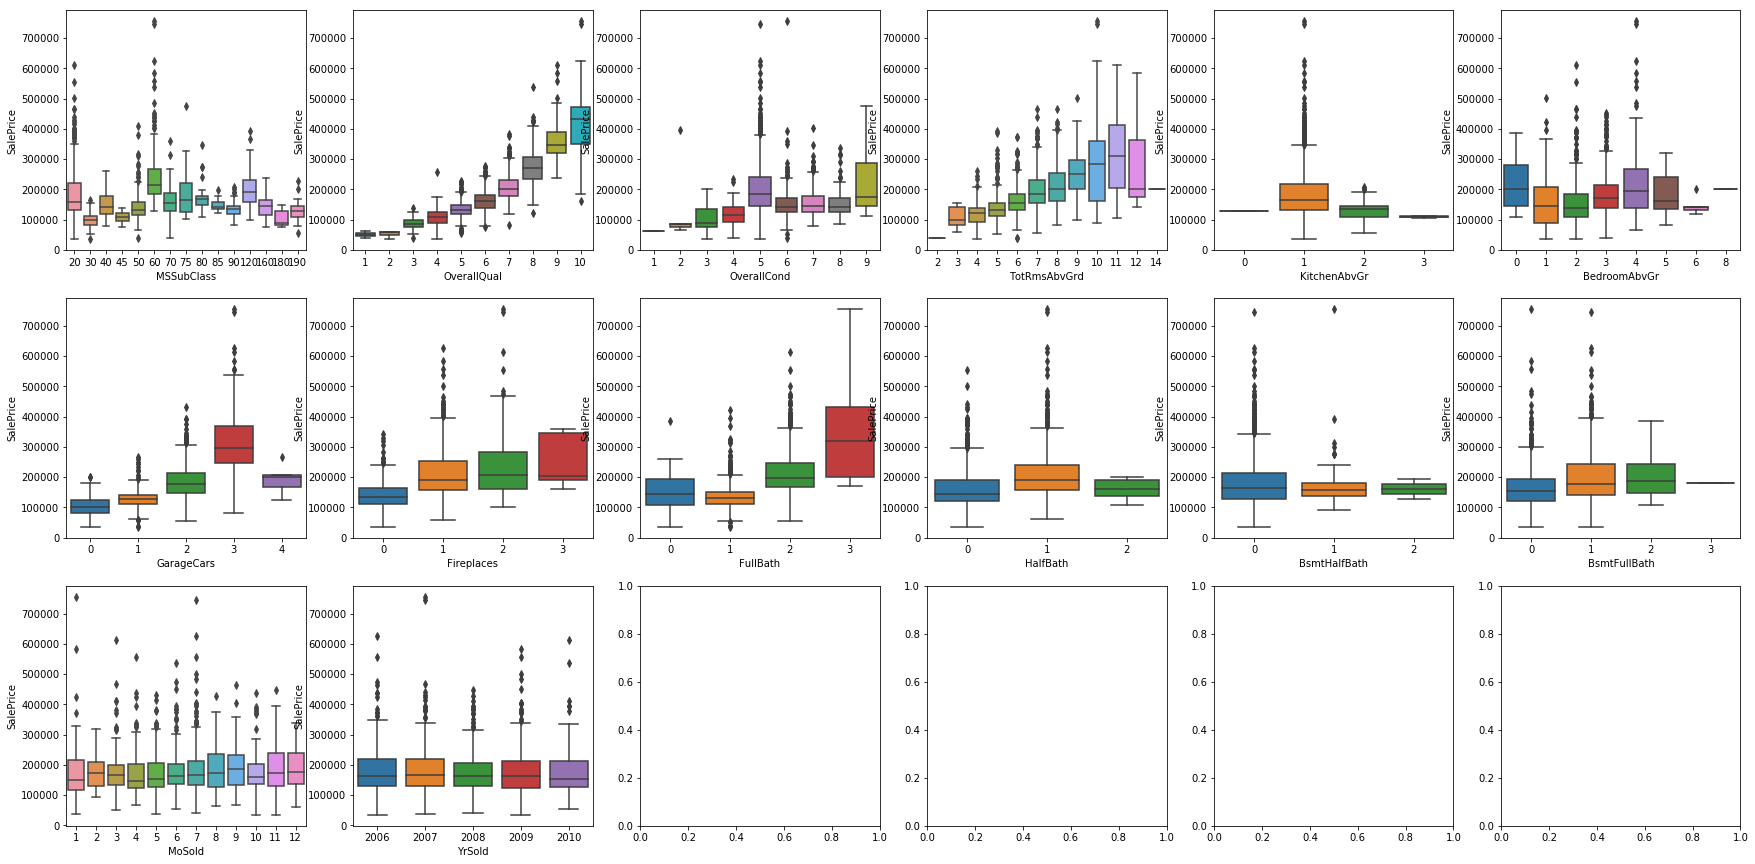

In [77]:
plotfeats(train, feats_numeric_discrete, kind='boxp', cols=6)

### 分析上图
    箱型图基本可以看做散点图的加强版：
        散点图：可以看出基本趋势；
        箱线图：可以一眼看出均值、主范围之内值的趋势，可以看出异常值的多少。

    现象：几乎所有异常值都是向上异常，即超出上界（上面的那根横线）；
    分析：说明了所有不在随大流的售价都是高价，没有地板价、吐血价、大甩卖价的大量出现，博弈中明显卖方占优。

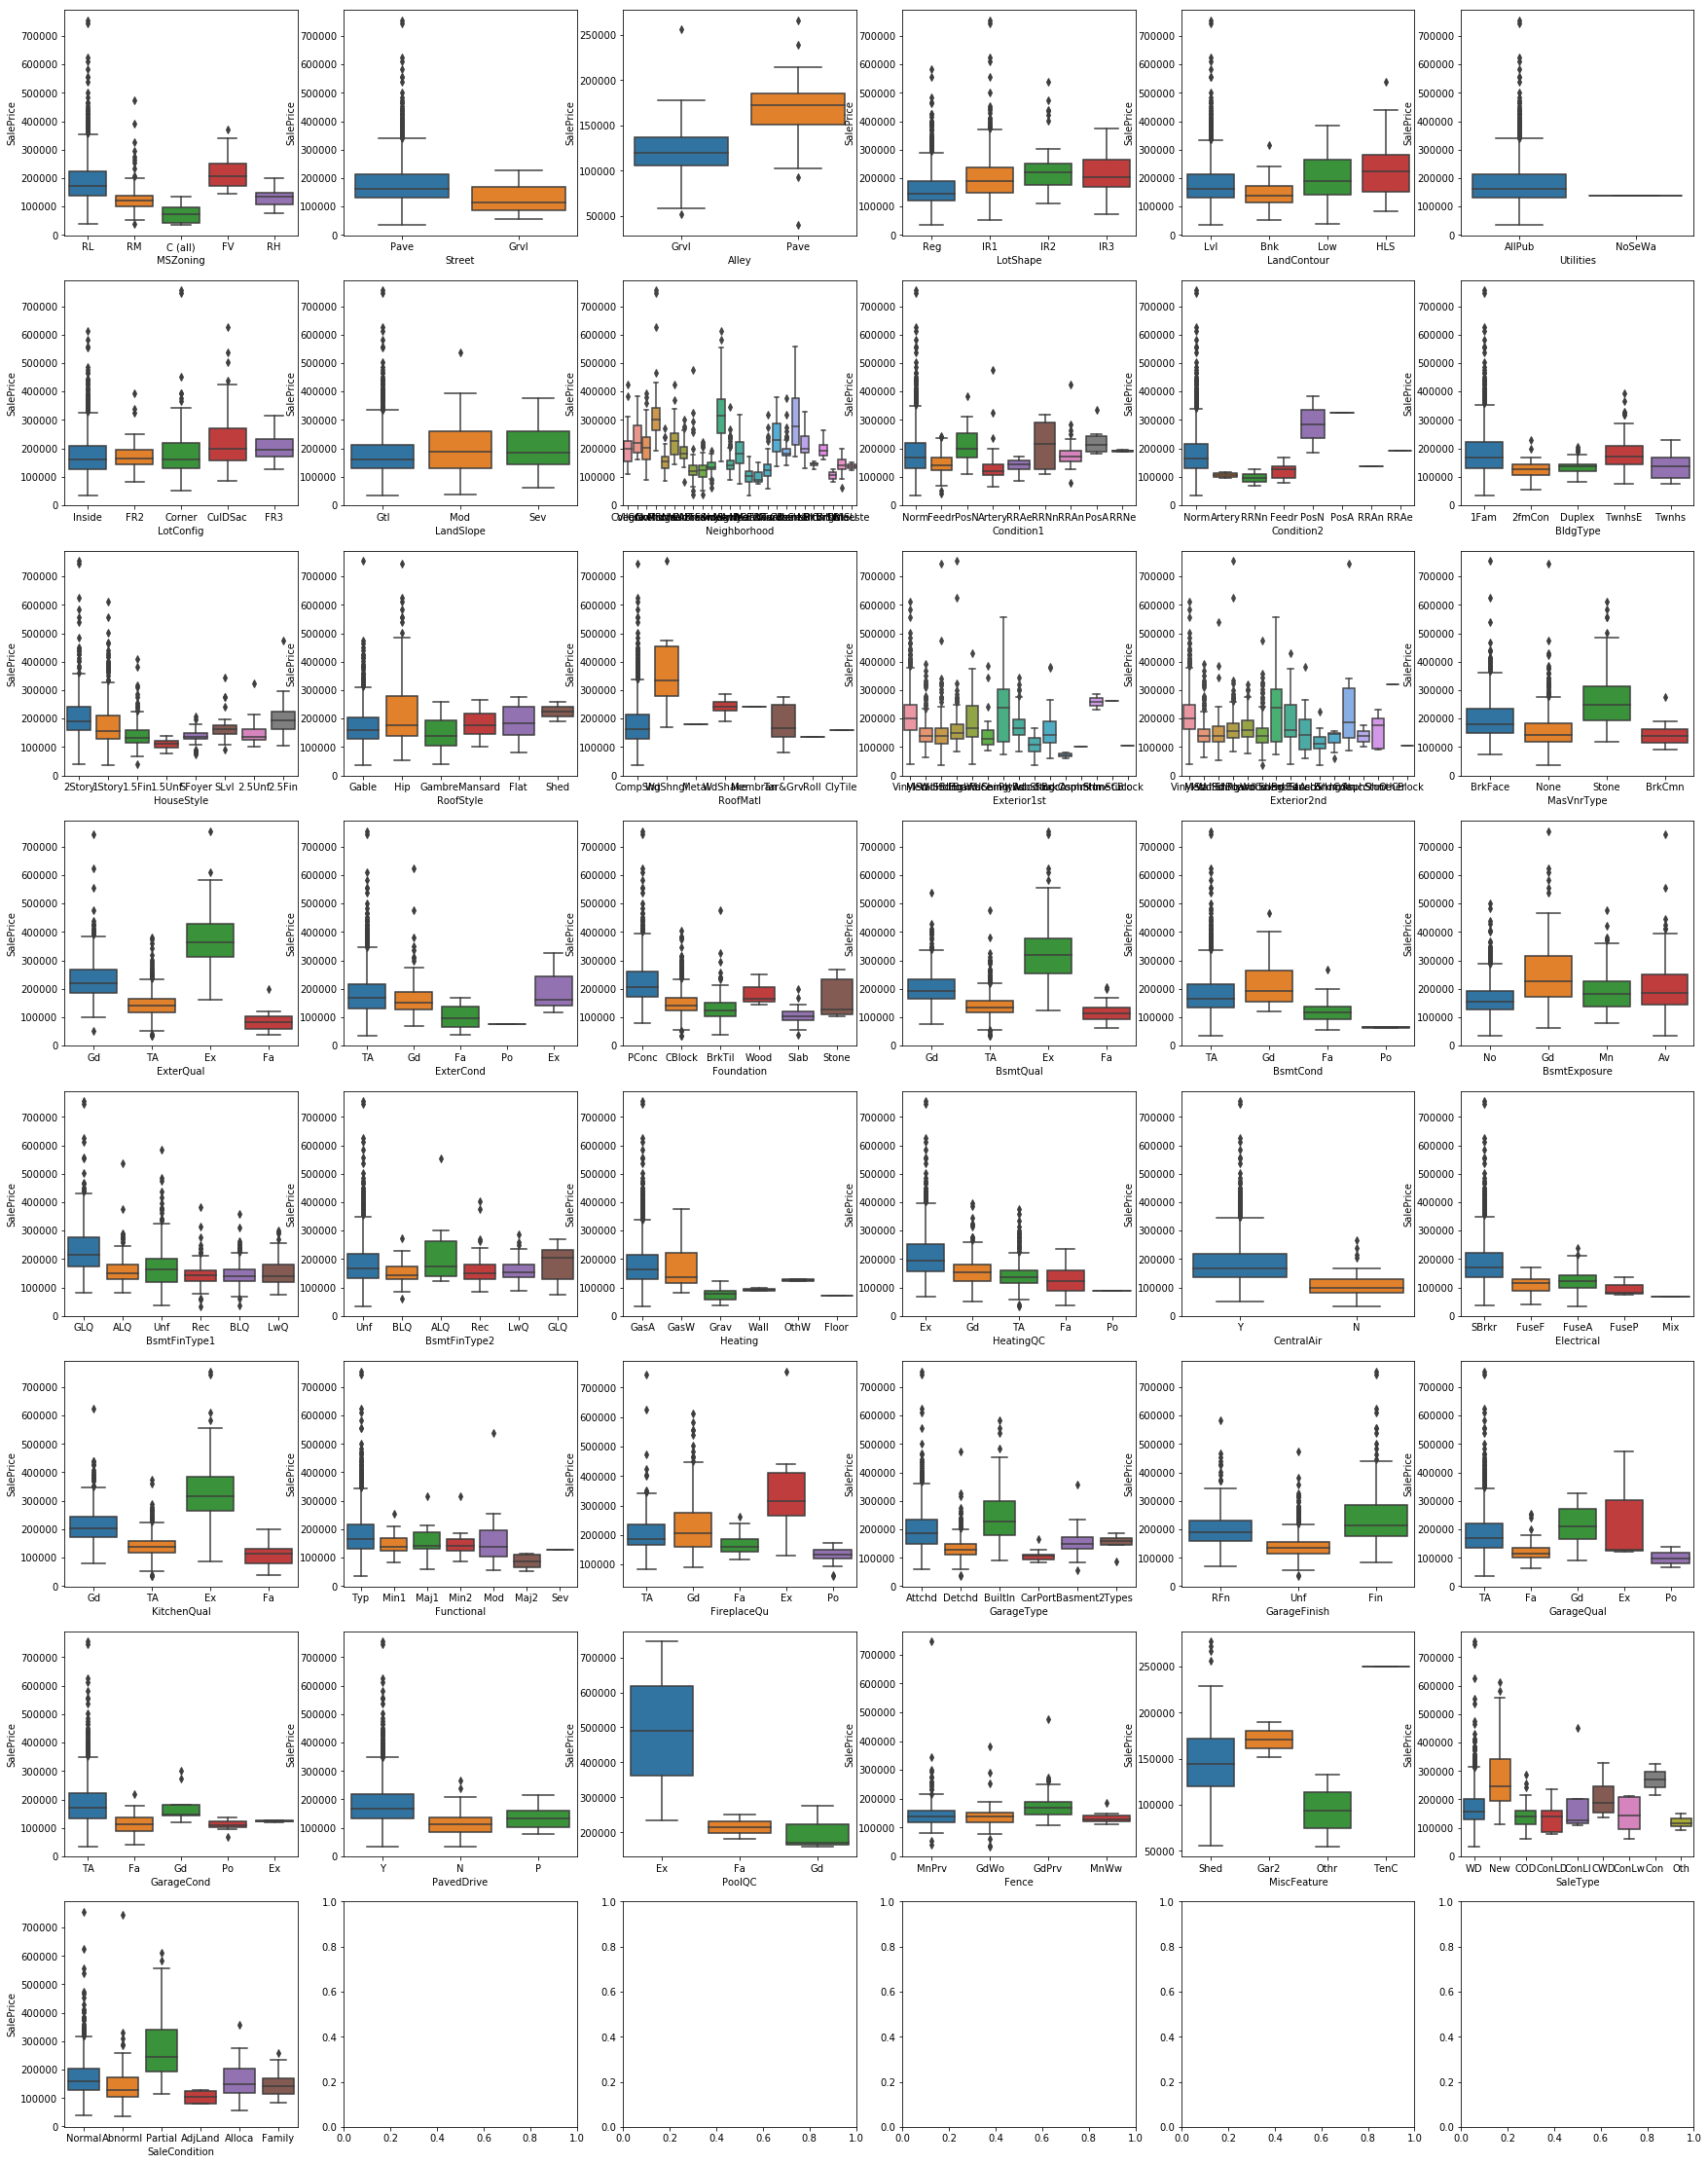

In [78]:
plotfeats(train, feats_object, kind='boxp', cols=6)

## 3）方差齐次检验（网络搜索了解，后续详细学习）

### 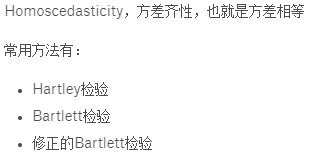

## 4）方差分析（bar）

#### Analysis of Variance，简称ANOVA,又称“变异数分析”或“F检验”.

#### 功能：分析两组数据之间的相关性；

### 学习笔记：

####   1）分类（网络搜索了解，后续详细学习） 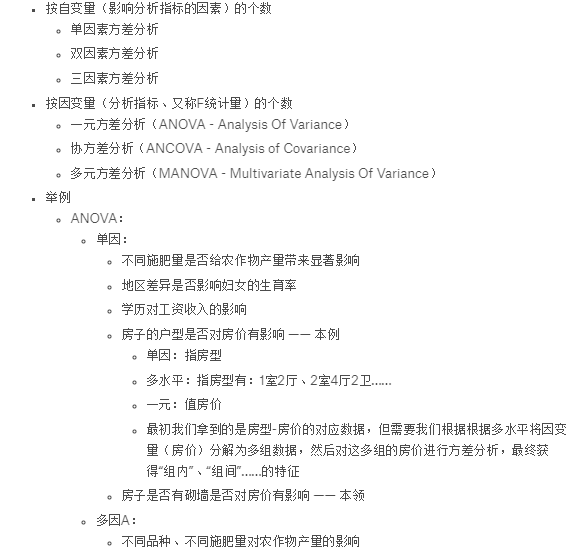

#### 2）指标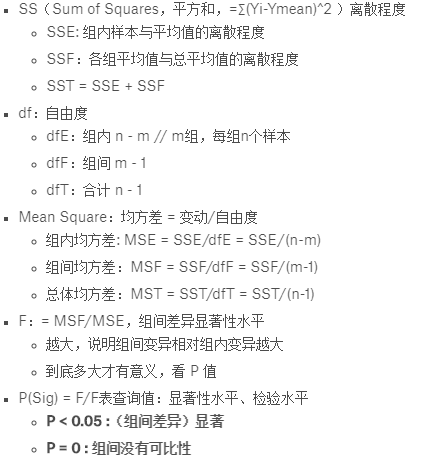

#### 3）实现 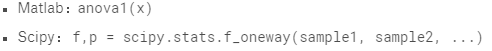

#### ========== test ==========

In [118]:
a = np.random.random(size=(1000, 20))
# b = np.random.random(size=1000,)
f, p = stats.f_oneway(*a)
print(f, p)

0.902485749648 0.985636204843


In [96]:
a = np.random.randn(1000,)
b = np.random.randn(1000,)
f, p = stats.f_oneway(a, b)
print(f, p)

0.060568436348 0.805625028402


In [90]:
a = np.random.randint(1, 10, size=1000,)
b = np.random.randint(1, 10, size=1000,)
c = np.random.randint(5, 15, size=1000,)
f, p = stats.f_oneway(a, b, c)
print(f, p)

931.789016544 2.05701032571e-315


In [86]:
a = np.random.randint(1, 10, size=1000,)
b = np.random.randint(5, 15, size=1000,)
f, p = stats.f_oneway(a, b)
print(f, p)

1318.44376332 3.93087005244e-222


In [87]:
a = np.random.binomial(5, 0.2, size=1000)
b = np.random.randn(1000,)
f, p = stats.f_oneway(a, b)
print(f, p)

603.514496354 1.12721229636e-116


#### ====== Test Over ======

### scipy.stats.f_oneway()：单因素分析
    目的：找出无效的特征和多余特征；
    
    方法：
        1）无效特征：通过查看特征与房价的“关联性显著度”，找出与房价相关性很差的特征；
        2）多余特征：通过查看两种特征的“关联性显著度”，找出分布规律非常相似的多种特征，只选取其中一种；

In [119]:
# 函数功能：将 2 列数据（自变量X、因变量Y）的 DataFrame 展缓为分组数据；（此处的参数 data 必须是两列数据）
# stats.f_oneway() 的入参是分好组的 2 个或多个 array；（也可以直接掺入：*dataframe）
def anovaXY(data):
    samples = []
    X = data.columns[0]
    Y = data.columns[1]
    for level in data[X].unique():# Series.unique()：返回一组数据的元素种类；
        if (type(level) == float):# np.NaN 的特殊处理
            s = data[data[X].isnull()][Y].values
        else:
            s = data[data[X] == level][Y].values
        samples.append(s)
    f, p = stats.f_oneway(*samples)
    return (f, p)

#### 使用方差分析某些 feature 和 SalePrice 之间的 “关联性显著度” 如何

In [120]:
df = pd.DataFrame(columns=('feature', 'f', 'logp'))
df['feature'] = feats_discrete
for fe in feats_discrete:
    data = pd.concat([train[fe], train['SalePrice']], axis=1)# 将 train 的每一种特征与 SalePrice 数据相连
    f, p = anovaXY(data)
    df.loc[df[df.feature==fe].index, 'f'] = f
    df.loc[df[df.feature==fe].index, 'p'] = p
    df.loc[df[df.feature==fe].index, 'logp'] = 1000 if (p==0) else np.log(1./p)
    
# OverallQual 的 p=0，说明房价和整体评价紧密相关

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]), <a list of 57 Text xticklabel objects>)

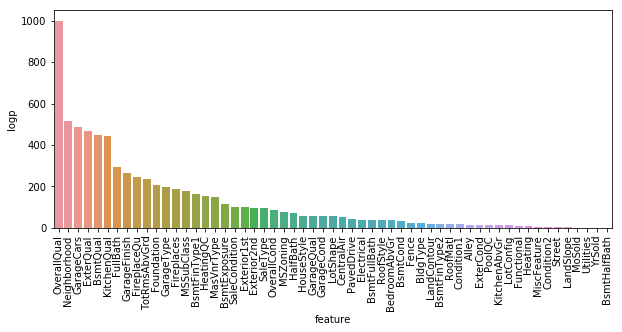

In [121]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df.sort_values('p'), x='feature', y='logp')
plt.xticks(rotation=90)

### pandas.Series.corr()
    功能：计算与其他组数据的相关性
    S1.corr(S2, )

In [137]:
def spearman(frame, features):
    """
    采用 “斯皮尔曼等级相关” 来计算变量与房价的相关性：Series1.corr(Series2, 'spearman')
    """
    spr = pd.DataFrame()
    spr['feature'] = features
    # 使用列表解析，计算每一列特征与 SalePrice 的相关性；
    spr['corr'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('corr')
    plt.figure(figsize=(6, 0.2*len(features)))
    # y 轴的名称是 feature，x 轴的名称为 corr，orient='h'——图垂直分布
    sns.barplot(data=spr, y='feature', x='corr', orient='h')
    plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


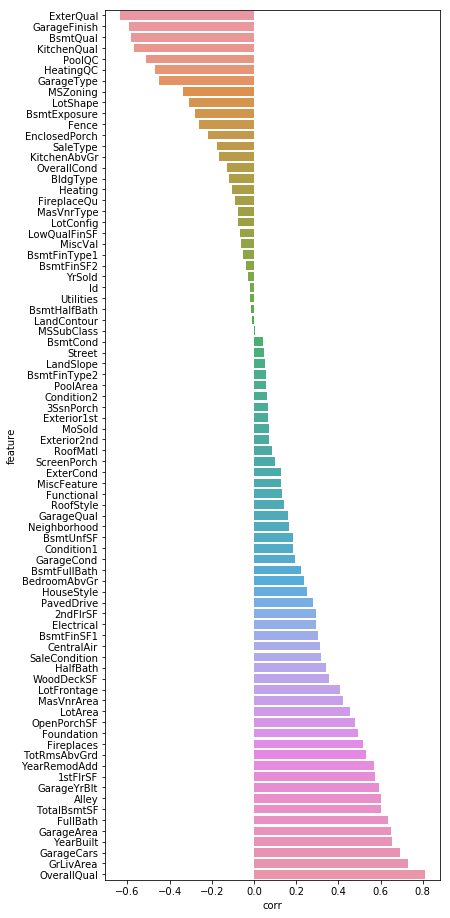

In [138]:
spearman(train, np.delete(train.columns.values, -1))

### 观察和分析：
    目的：删除具有重复性质的特征，和 SalePrice 有相同相关性的多种特征，只保留一种
    1）GarageCars 和 GarageArea：因为 GarageCars 与 SalePrice 相关系数更大，可以保留这个，删除 GarageArea
    2）同理，TotalBsmtSF 删除，保留 1stFlrSF

## 5）协方差分析（-1 ~ +1）

### 上面的方差分析，其实不过是下面协方差结果中的一列而已。
    使用 DataFrame.corr(method='pearson', min_periods=1) 函数计算协方差，此函数返回值也是个 DataFrame，非常适合 heatmap 来绘图展示。
    
    方法：有 3 种，pearson、kendall、spearman（scikit-learn 库中 dataframe.corr 方法有介绍，后续查其背后数学思想）

### 协方差
    定义：衡量两组数据的总体误差；（方差：衡量一组数据的总体误差）
    思路：
        1）如果两组数据的变化趋势一样，两组数据的协方差大于 0；
        2）如果两组数据的变化趋势相反，两组数据的协方差小于 0；
    
    目的：删除多余的特征；
    方法：计算两种特征数据的协方差，如果两种特征数据的分布趋势非常相近，则可以只选择其中一种特征；

In [140]:
corr_pearson = train.corr(method='pearson')
corr_spearman = train.corr(method='spearman')

In [146]:
corr_pearson[:5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [141]:
# corrmat 是 38*38 的矩阵，所以只是 numeric 的 feature 才会参与计算
corr_pearson.shape

(38, 38)

In [142]:
corr_spearman.shape

(38, 38)

### 1、协方差热图（heatmap）
    1）heatmap:
        matplotlib 画heatmap比较麻烦，没有简单接口
        sns.heatmap() 是个不错的选择
    2）颜色越浅，协方差越大，两个变量关联性越大；
    3）颜色越深，逆相关;

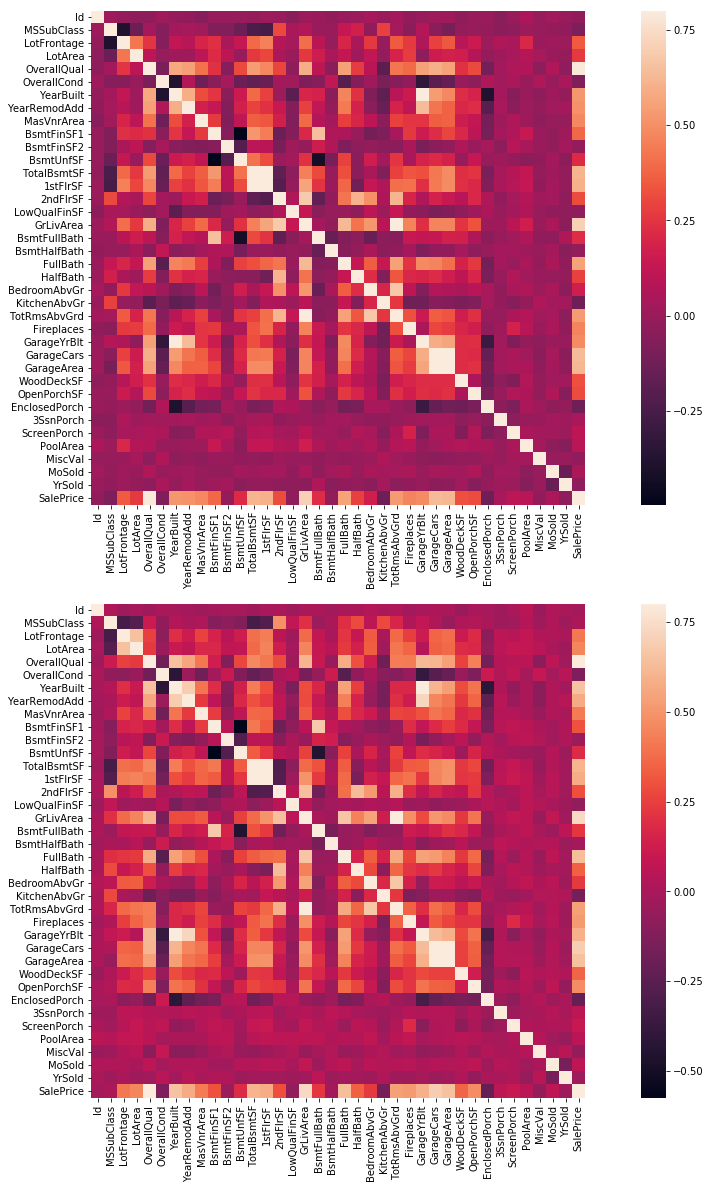

In [143]:
# 注：如果不设置 figsize，会出现部分数据不显示的情况；
    # 就是说要手工计算充分的空间给 sns.heatmap()

plt.figure(figsize=(20, 20))
plt.subplot(211)
sns.heatmap(corr_pearson, vmax=0.8, square=True)
plt.subplot(212)
sns.heatmap(corr_spearman, vmax=0.8, square=True)

### 分析上图：
    中间2个比较大的白色块：
        1）TotalBsmtSF--1stFlrSF：地下室面积和1楼面积正相关
        2）GarageCars--GarageArea：车库面积和停车容量正相关
        3）上面4个在建模时可以去除2个，另外2个是无效feature
        4）这叫：多重共线性

### 2、协方最大关联图（pairplot）

In [148]:
feats_d = corr_pearson.nlargest(8, 'SalePrice').index
feats_d

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath'],
      dtype='object')

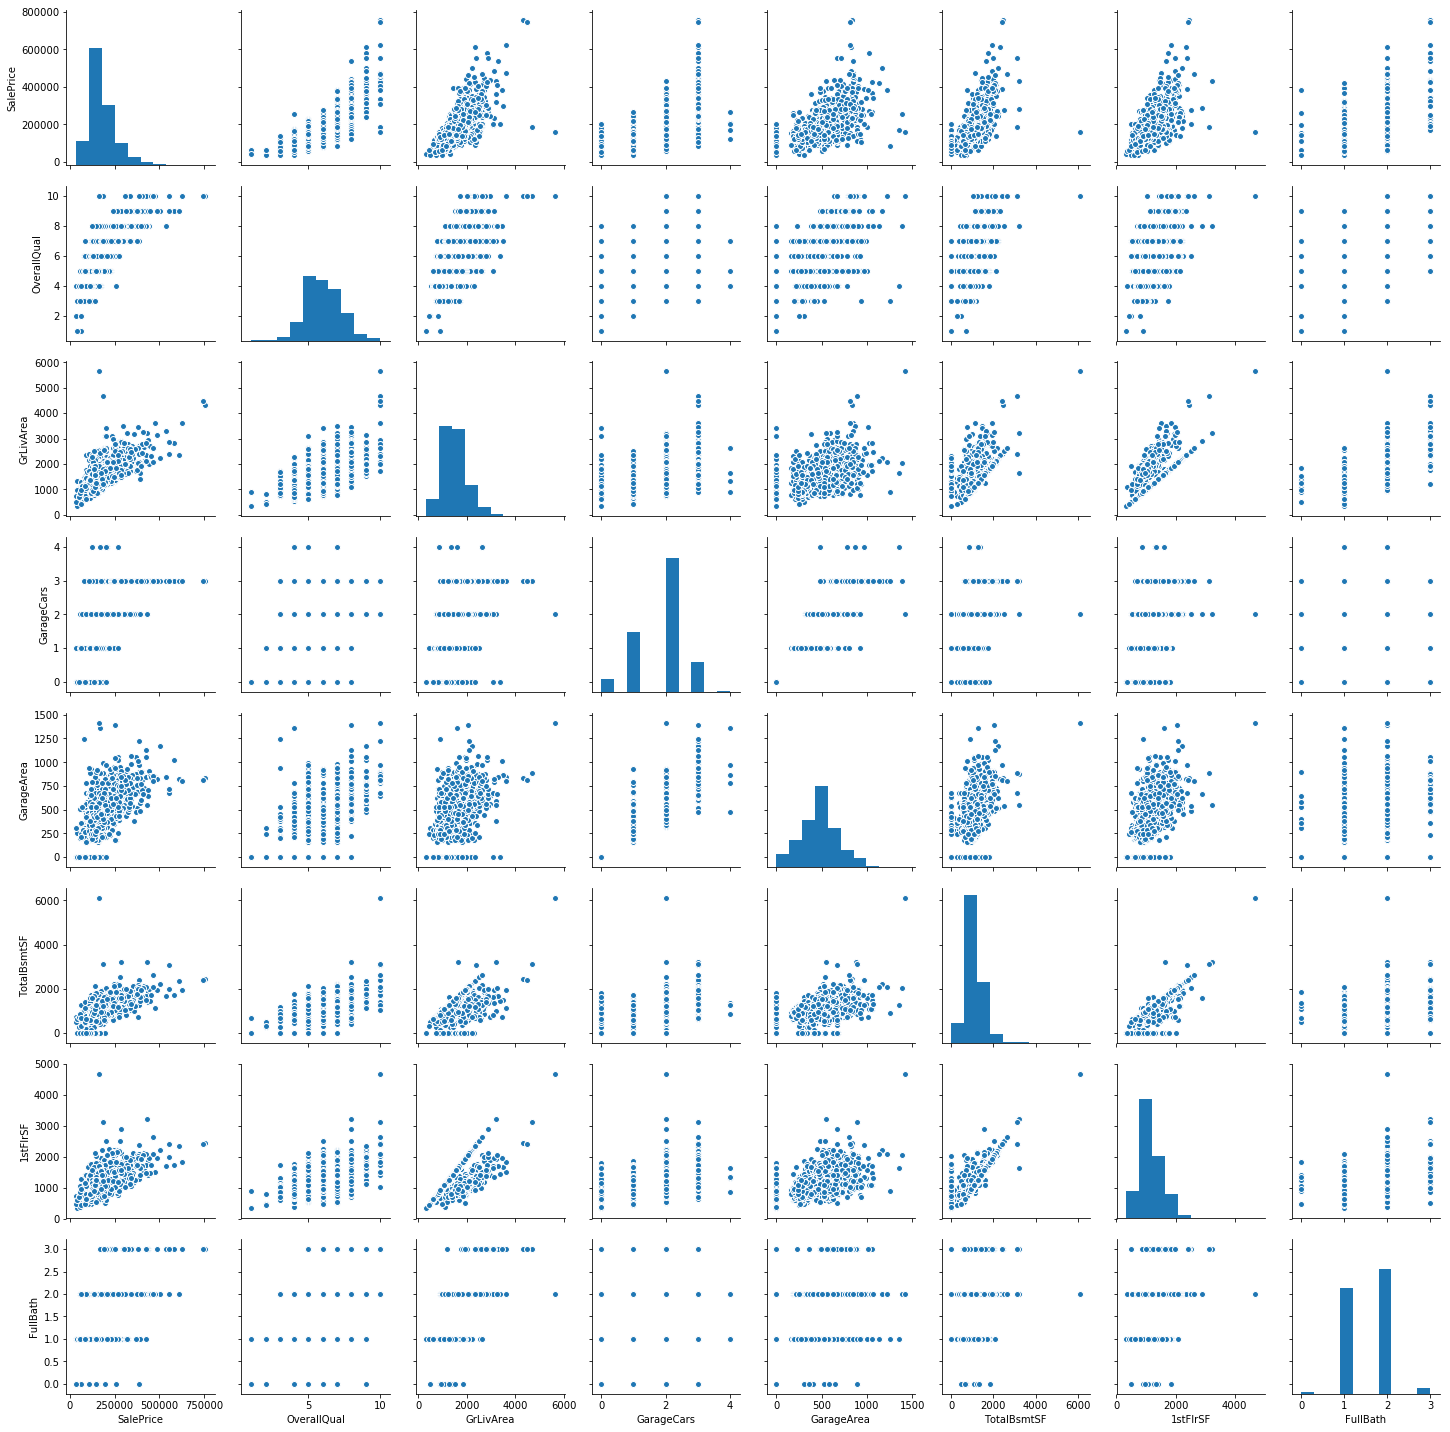

In [149]:
sns.pairplot(train[feats_d], size=2.5)

# （三）数据处理

## 1）无效数据处理

#### 1、无效特征处理
    目的：删除一些违反原则的特征；
    原则/方法：
        1）特征与房价相关性不强，或者根本没有相关性；
        2）两种特征分布规律非常的接近，只选用其中一种特征；
        3）也可认为的判断一些不科学的特征；（有可能是虚假的信息）
    
    违反原则的特征：
        YrSold、MoSold：经分析，该 2 种特征与预测房价不相关
        
    其它：
        1）OverallQual: 太人为化了，完全不理性，甚至说可能是售价的因变量（售价是自变量）
        2）YearBuild: 房地产的口头禅 —— 地段、地段、地段，房龄几乎无关

In [150]:
feats_del = ['YrSold', 'MoSold']# 找出违规特征

In [151]:
all_data.shape

(2919, 79)

In [152]:
all_data.drop(feats_del, axis=1, inplace=True)# 删除违规特征

In [153]:
# 同步修正 4 个特征名称集
for f in feats_del:
    feats_numeric = np.delete(feats_numeric, np.where(feats_numeric==f))
    feats_object = np.delete(feats_object, np.where(feats_object==f))
    feats_continu = np.delete(feats_object, np.where(feats_continu==f))
    feats_discrete = np.delete(feats_discrete, np.where(feats_continu==f))

In [154]:
all_data.shape

(2919, 77)

#### 2、离群点处理
    目的：将存在异常特征的样本删除；（异常特征值也即是离群点）
    方法：根据“正态性分析”、“箱形图分析”，找出的异常的特征值；
    离群点：在特征与房价的分布规律中，离趋势的点；（也即是异常的特征值）
    
    注意：离群点不同于分散度；比如某特征和房价是正相关的，即使某些特征值在趋势轴上很分散，也不可以删除；而不在趋势轴上的“离群点”是需要删除的。

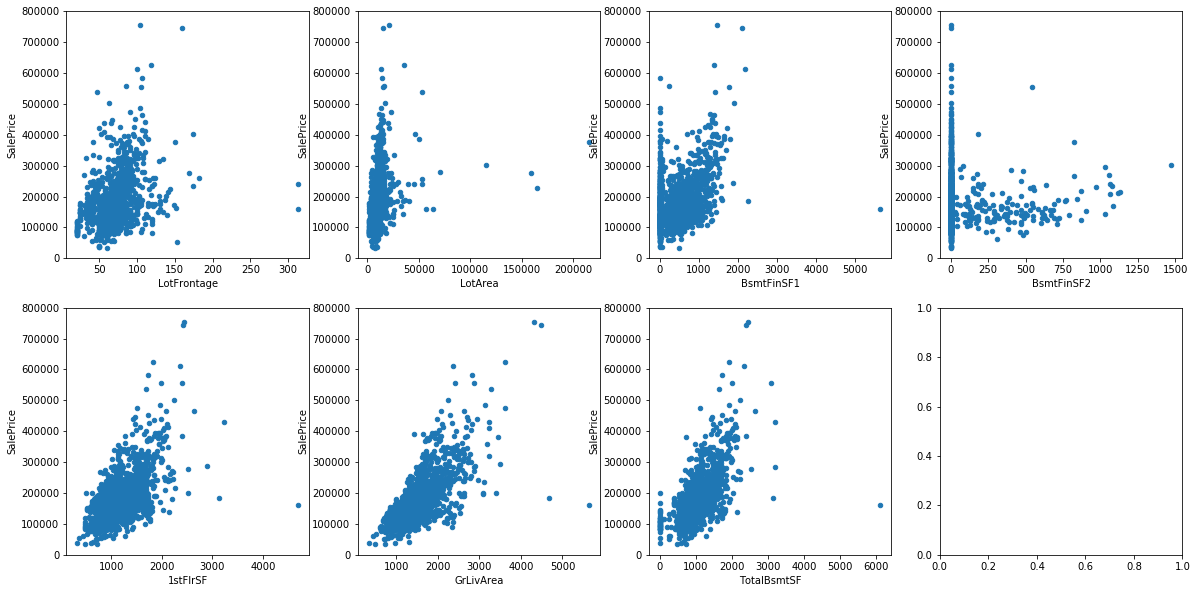

In [155]:
# 经过前面偏离度分析，可以观察得出下面几个 feature 存在利群点：
feats_away = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF']
plotfeats(train, feats_away, kind='scatter')

#### 注意：
    离群点是以 SalePrice 为参照的，而 all_data 中没有 SalePrice，只有 train 中有。all_data  前面已经重新排序了Id，但前半部分的的 Id 应该是和 train 相同的，可以使用。

In [185]:
ids = []

#### 查看上述 7 个特征的利群特征值所在的行（也就是存在利群特征的样本）

In [186]:
train.sort_values(by='LotFrontage', ascending=False)[:2][['Id', 'LotFrontage', 'SalePrice']]

,Id,LotFrontage,SalePrice
1298,1299,313.0,160000
934,935,313.0,242000


In [187]:
ids.append(1299)
ids.append(935)

In [188]:
train.sort_values(by='LotArea', ascending=False)[:2][['Id', 'LotArea', 'SalePrice']]

,Id,LotArea,SalePrice
313,314,215245,375000
335,336,164660,228950


In [189]:
ids.append(314)
ids.append(336)

In [190]:
train.sort_values(by='BsmtFinSF1', ascending=False)[:2][['Id', 'BsmtFinSF1', 'SalePrice']]

,Id,BsmtFinSF1,SalePrice
1298,1299,5644,160000
523,524,2260,184750


In [191]:
ids.append(1299)
ids.append(524)

In [192]:
train.sort_values(by='1stFlrSF', ascending=False)[:2][['Id', '1stFlrSF', 'SalePrice']]

,Id,1stFlrSF,SalePrice
1298,1299,4692,160000
496,497,3228,430000


In [193]:
ids.append(1299)
ids.append(497)

In [194]:
train.sort_values(by='GrLivArea', ascending=False)[:2][['Id', 'GrLivArea', 'SalePrice']]

,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750


In [195]:
ids.append(1299)
ids.append(524)

In [196]:
train.sort_values(by='TotalBsmtSF', ascending=False)[:2][['Id', 'TotalBsmtSF', 'SalePrice']]

,Id,TotalBsmtSF,SalePrice
1298,1299,6110,160000
332,333,3206,284000


In [197]:
ids.append(1299)
ids.append(333)

In [198]:
np.unique(ids)

array([ 314,  333,  336,  497,  524,  935, 1299])

In [199]:
print(train.shape, test.shape, all_data.shape)

(1460, 81) (1459, 80) (2919, 77)


In [202]:
for id in np.unique(ids):
    train = train.drop(train[train.Id==id].index)
    all_data = all_data.drop(all_data[all_data.index==(id-1)].index)

In [203]:
print(train.shape, test.shape, all_data.shape)

(1453, 81) (1459, 80) (2912, 77)


#### 3、缺失值处理
    1）缺失值不等于 'NA' 
        1、字符串调整的 'NA' 分两类：'NA' 具有实际意义、'NA' 代表缺失；
        2、数量值特征中的 np.NaN 一般都是缺失值；
    2）缺失比例太大，分析特征对任务有没有用
        1、如果没有用，直接删除特征；
        2、如果有用，补全：（填补的方法待确认）
    3）缺失值比例不大，需要不全
        1、数值型特征：用 min、max、mean、median 或者 mod 补全；
        2、字符型特征：做编码操作；

#### A）NaN 和 NA 的处理函数
    1）NaN：float 型，表示 numeric 型特征的缺失值；
    2）NA：string 型，表示 object 型特征的缺失值；

In [263]:
# python 中 NaN 的类型
print(type(None), type(np.NaN))

<class 'NoneType'> <class 'float'>


In [205]:
def NaNRatio(frame, feats):
    """
    查找并统计 numpy.NaN 的值，feats 可以是数值型特征 or 字符型特征
    """
    na_count = frame[feats].isnull().sum().sort_values(ascending=False)
    na_rate = na_count / len(frame)
    na_data = pd.concat([na_count, na_rate], axis=1, keys=['count', 'ratio'])
    return na_data[na_data['count'] > 0]

In [206]:
def NARatio(frame, feats):
    """
    查找并统计字符串 NA 的值
    """
    nadict = {}
    for c in feats:
        # 方法一：
        # frame[f][frame[f]=='NA'] -- 此方法只能比较 object 列，numeric 列会出错
        # 方法二：
        for r in frame.index:
            if 'NA' == frame.loc[r, c]:
                if 0==nadict.get(c, 0):
                    nadict[c]=[]
                nadict[c].append(r)
    return nadict

In [213]:
def transNaNtoNumber(frame, column, method, val=0):
    """
    将 numpy.NaN 转为指定的数字
    """
    if method == 'mean':
        frame[column] = frame[column].fillna(round(frame[column].mean()))
    elif method == 'min':
        frame[column] = frame[column].fillna(round(frame[column].min()))
    elif method == 'max':
        frame[column] = frame[column].fillna(round(frame[column].max()))
    elif method == 'special':
        frame[column] = frame[column].fillna(val).round()
    else:
        return
    return frame

In [237]:
def transNaNtoNA(frame, feature):
    """
    将 numpy.NaN 转为字符串 NA
    """
    # frame[feature][df[feature].isnull()] = 'NA' # 这么写有warnning
    frame.loc[frame[feature].isnull(),feature] = 'NA'

In [238]:
def transNAtoNumber(frame, feat, val=0):
    """
    将字符串 NA 替换为指定数值（默认0）
    """
    for r in frame[frame[feat]=='NA'].index:
        frame.loc[r, feat] = val
    return frame

#### B）将数值型特征的 np.NaN 替换：min、max、mean

In [221]:
# 查看数值型特征的 NA 值的数量和比例

pd.concat([NaNRatio(train, feats_numeric), NaNRatio(test, feats_numeric)], axis=1)

,count,ratio,count,ratio
BsmtFinSF1,NaN,NaN,1,0.000685
BsmtFinSF2,NaN,NaN,1,0.000685
BsmtFullBath,NaN,NaN,2,0.001371
BsmtHalfBath,NaN,NaN,2,0.001371
BsmtUnfSF,NaN,NaN,1,0.000685
GarageArea,NaN,NaN,1,0.000685
GarageCars,NaN,NaN,1,0.000685
GarageYrBlt,81.0,0.055747,78,0.053461
LotFrontage,257.0,0.176875,227,0.155586
MasVnrArea,8.0,0.005506,15,0.010281


#### 根据上图找出的含有 NaN 的特征，逐个分析补齐缺失值

In [222]:
# LotFrontage（到街道的距离）：取平均值；
all_data = transNaNtoNumber(all_data, 'LotFrontage', 'mean')

# GarageYrBlt（车库的建造年份）：有些房子因为没有车库才没有年份，不能取平均值，暂取最小值
all_data = transNaNtoNumber(all_data, 'GarageYrBlt', 'min')

# MasVnrArea（砌墙面的面积）：因为没有砌墙才导致为 0，取最小值替代；
all_data = transNaNtoNumber(all_data, 'MasVnrArea', 'special', 0)

# 其它：比例较小，同一用 mean 替代
all_data = all_data.fillna(all_data.mean())

In [224]:
# all_data 中的数值型特征中已经没有 np.NaN
pd.concat([NaNRatio(all_data, feats_numeric)], axis=1)

,count,ratio


#### C）先将字符型特征的 'NA' 替换：仅做类型转换；（方便后续编码操作：将 'NA' 编码成数值型）
    如果有 np.NaN 的特征值，将其从float类型的 NaN 转变为char的"NA"；因为这些'NA'都是有意义的，不是缺失，而是某个特定含义值。

In [225]:
pd.concat([NaNRatio(train, feats_object), NaNRatio(test, feats_object)], axis=1)

,count,ratio,count,ratio
Alley,1362.0,0.937371,1352.0,0.926662
BsmtCond,37.0,0.025465,45.0,0.030843
BsmtExposure,38.0,0.026153,44.0,0.030158
BsmtFinType1,37.0,0.025465,42.0,0.028787
BsmtFinType2,37.0,0.025465,42.0,0.028787
BsmtQual,37.0,0.025465,44.0,0.030158
Electrical,1.0,0.000688,NaN,NaN
Exterior1st,NaN,NaN,1.0,0.000685
Exterior2nd,NaN,NaN,1.0,0.000685
Fence,1172.0,0.806607,1169.0,0.801234


In [239]:
for c in feats_object:
    transNaNtoNA(all_data,c)

In [240]:
# all_data 中的字符串型特征中农已经没有 np.NaN
NaNRatio(all_data, feats_object)

,count,ratio


## 2）标准化（Normalization）处理

#### 标准化简介：
    定义：将实际的值区间转换为标准的值区间(通常为 -1 到 +1 或 0 到 1)的过程
    
    例如，假设某个特征的自然区间是 800 到 6000。通过减法和除 法运算,您可以将这些值标准化为位于 -1 到 +1 区间内。

#### 常用的标准化方法：
    1、均方差归一化（standardization）：xi_new = (xi - x_mean) / std
    2、最值归一化（normalization）：xi_new = (xi - x_min) / (x_max - x_min)
    3、小数定标标准化（Decimal scaling）：（待理解补充）

### numeric 特征数据标准化

In [241]:
all_data[feats_numeric] = all_data[feats_numeric].apply(lambda x : (x-x.mean())/(x.std()))

#### 标准化后的分散度

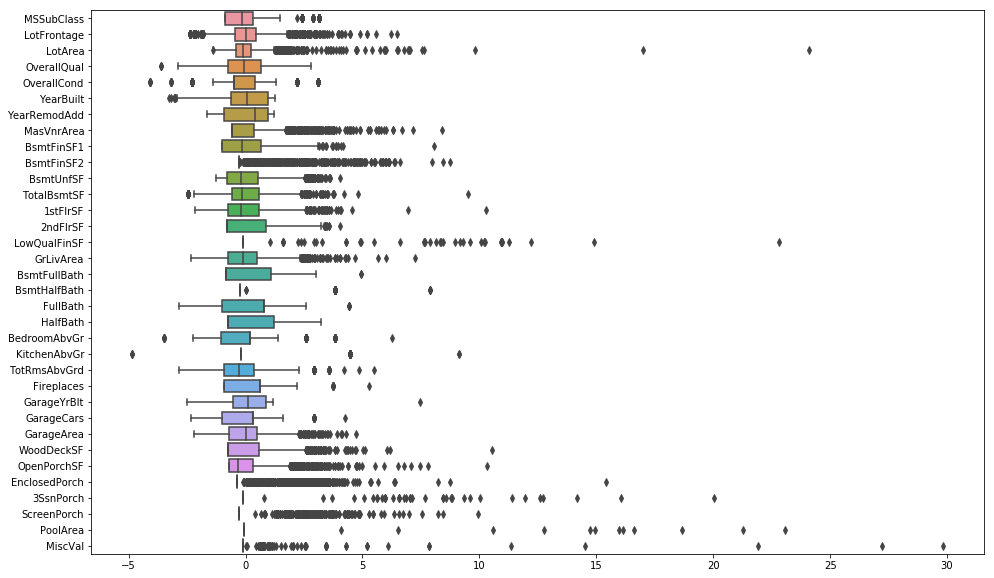

In [252]:
plt.figure(figsize=(16, 10))

plt.subplot(111)
sns.boxplot(data=all_data, orient='h')

## 3）离散量编码

    目的：字符量转为数值量；
    
    离散/类型量都可以进行重新编码（encoding）
        1、字符型 - 离散量：编码也就是字符量的数值化；
        2、数值型 - 离散量：（方法与内容待理解补充）

#### 离散量编码的常用方法：
    1）One-Hot Encoding: 将离散量变为多个特征 —— 因为只考虑特征本身，so，可以用 all_data 来计算
    2）分组-均值-排序法：对特征的不同取值分组，并计算每组y的均值，然后排序，最后分别将分组数值化为1,2,3...

#### 1、One-Hot-Encoding（独热编码）
    定义：本质是按位编码，即使用 1bit 表示一个状态；
    
    目的：
        1）解决了分类器不好处理属性数据的问题，属性通常为序列值(字符串等)，而不是连续值，序列值没有连续值的大小、优劣……之分
        2）将序列型的属性对应到欧式空间
        3）在一定程度上也起到了扩充特征的作用

#### 实现：
    1、from sklearn import preprocessing
       preprocessing.OneHotEncoder(sparse=False).fit_trainsform()
    2、pandas.get_dummies() // dummy variables(虚拟变量、哑变量、离散特征编码)

In [257]:
all_data.shape

(2912, 77)

#### 2、分组 - 均值 - 排序数值化

    步骤：以 SalePrice 为参考，将某个特征按每个离散值计算 SalePrice 对应的均值，排序后给出 1、2、3...等数值
    
    注意：
        1、在 train 上计算 SalePrice 的均值，再应用到all_data 上；
        2、np.NaN 和 'NA' 的区别；

#### A）第一步
    1）将 一个字符型特征的数据，按其类型（unique）分类：共 frame[feature].unique() 种分类；
    2）计算每种特征值所对应的 SalePrice 的平均值（同一中特征值可能对应多种房价），按 SalePrice 平均值的大小对特征数据进行排序；
    3）按排好的顺序，将没种字符型特征值赋值为 1、2、3、...

In [259]:
def encode(frame, feature, targetfeature='SalePrice'):
    ordering = pd.DataFrame()
    # 1）找出指定特征的水平值（也就是一种特征数据的元素种类），并做临时 df 的引索
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    # 2）按各水平分组，并求每组房价的均值
    ordering['price_mean'] = frame[[feature, targetfeature]].groupby(feature).mean()[targetfeature]
    # 3）排序并为 order 列赋值 1、2、3、。。。
    ordering = ordering.sort_values('price_mean')
    ordering['order'] = range(1, ordering.shape[0]+1)
    ordering = ordering['order'].to_dict()
    return ordering

####           'NA' 才能做 encode()，否则在计算 groupby() 时会漏掉 NaN 型

#### 测试：

In [260]:
encode(train, 'BsmtCond') # numpy.NaN 的处理不是所希望的

{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, nan: 5}

In [262]:
dfc = train.copy()
transNaNtoNA(dfc, 'BsmtCond') # 把 NaN 转为 ‘NA’
encode(dfc, 'BsmtCond') # 字符串 NA 能够正确处理

{'Fa': 3, 'Gd': 5, 'NA': 2, 'Po': 1, 'TA': 4}

#### 测试完毕

In [264]:
dfc = train.copy()

for fb in feats_object:
    print("\r\n-------\r\n", fb, end=':')
    transNaNtoNA(dfc, fb)
    for attr_v, score in encode(dfc, fb).items():
        print(attr_v, score, end='\t')
        all_data.loc[all_data[fb] == attr_v, fb] = score


-------
 MSZoning:C (all) 1	RM 2	RH 3	RL 4	FV 5	
-------
 Street:Grvl 1	Pave 2	
-------
 Alley:Grvl 1	Pave 2	NA 3	
-------
 LotShape:Reg 1	IR3 2	IR1 3	IR2 4	
-------
 LandContour:Bnk 1	Lvl 2	Low 3	HLS 4	
-------
 Utilities:NoSeWa 1	AllPub 2	
-------
 LotConfig:Inside 1	FR2 2	Corner 3	FR3 4	CulDSac 5	
-------
 LandSlope:Gtl 1	Sev 2	Mod 3	
-------
 Neighborhood:MeadowV 1	IDOTRR 2	BrDale 3	BrkSide 4	Edwards 5	OldTown 6	Sawyer 7	Blueste 8	SWISU 9	NPkVill 10	NAmes 11	Mitchel 12	SawyerW 13	NWAmes 14	Gilbert 15	Blmngtn 16	CollgCr 17	Crawfor 18	ClearCr 19	Somerst 20	Veenker 21	Timber 22	StoneBr 23	NridgHt 24	NoRidge 25	
-------
 Condition1:Artery 1	RRAe 2	Feedr 3	Norm 4	RRAn 5	RRNe 6	RRNn 7	PosN 8	PosA 9	
-------
 Condition2:RRNn 1	Artery 2	Feedr 3	RRAn 4	Norm 5	RRAe 6	PosA 7	PosN 8	
-------
 BldgType:2fmCon 1	Duplex 2	Twnhs 3	TwnhsE 4	1Fam 5	
-------
 HouseStyle:1.5Unf 1	SFoyer 2	1.5Fin 3	2.5Unf 4	SLvl 5	1Story 6	2Story 7	2.5Fin 8	
-------
 RoofStyle:Gambrel 1	Gable 2	Mansard 3	Flat 4	Hip 5	

#### 注：个别特征，train 中没有 NA，但在 test 中有 NA，需要单独处理

In [265]:
# 检测 all_data 中是否还有 np.NaN
NaNRatio(all_data, all_data.columns.values)

,count,ratio


In [266]:
# 检测 all_data 中是否还有 NA
stillNA = NARatio(all_data, all_data.columns.values)
stillNA

{'Exterior1st': [2151],
 'Exterior2nd': [2151],
 'Functional': [2216, 2473],
 'KitchenQual': [1555],
 'MSZoning': [1915, 2216, 2250, 2904],
 'SaleType': [2489],
 'Utilities': [1915, 1945]}

In [272]:
# 现在的 all_data 数据集中，除了 stillNA 中查出的 NA 数据，其它都是 number 类型的数据，直接将这些 NA 赋平均值
dftemp = all_data.copy()
for sn in stillNA.keys():
    dftemp = transNAtoNumber(dftemp, sn)# 先将特征数据中的 NA 转为 0，在计算该组特征数据的平均值；
    all_data = transNAtoNumber(all_data, sn, dftemp[sn].mean())

# （四）机器学习

In [282]:
X_train = all_data[:1453]

In [287]:
X_test = all_data[1453:]

In [292]:
y_train = train['SalePrice']

#### 评测标准：均方根误差（RMSE）

In [312]:
def get_rmse_log(net, X_train, y_train):
    num_train = X_train.shape[0]
    clipped_preds = nd.clip(net(X_train),1,float('inf'))
    return np.sqrt( 2 * nd.sum(square_loss(nd.log(clipped_preds), nd.log(y_train))).asscalar()/num_train)

In [319]:
# def train(reg, X_train, y_train, X_test, y_test, epochs, learning_rate, weight_decay):
#     """
#     训练模型
#     """
#     train_loss = []
#     if X_test is not None:
#         test_loss = []
#     batch_size = 100
#     dataset_train = gluon.data.ArrayDataset(X_train, y_train)
#     data_iter_train = gluon.data.DataLoader(dataset_train, batch_size,shuffle=True)
#     trainer = gluon.Trainer(net.collect_params(), 'adam',
#                             {'learning_rate': learning_rate,
#                              'wd': weight_decay})
#     net.collect_params().initialize(force_reinit=True)
#     for epoch in range(epochs):
#         for data, label in data_iter_train:
#             with autograd.record():
#                 output = net(data)
#                 loss = square_loss(output, label) 
#             loss.backward()
#             trainer.step(batch_size)

#         # 训练用 L2Loss，画图和返回用 RMSE Loss
#         train_loss.append(get_rmse_log(net, X_train, y_train))
#         if X_test is not None:
#             test_loss.append(get_rmse_log(net, X_test, y_test))

        
#     # 返回的是 epochs 个过程 loss
#     if X_test is not None:
#         return train_loss, test_loss
#     else:
#         return train_loss

### 使用线性回归训练模型

In [329]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.2, random_state=666)

In [330]:
# help(train_test_split)

In [331]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [332]:
reg.score(X_test_new, y_test_new)

0.88713792073655118

In [318]:
# def k_fold_cross_valid(k, epochs, X_train, y_train, learning_rate, weight_decay, units=128, dropout=0.1, savejpg=False):
#     """
#     交叉验证，并绘制学习率曲线
#     """
#     assert k > 1
#     fold_size = X_train.shape[0] // k
#     train_loss_sum = 0.0
#     test_loss_sum = 0.0
#     train_loss_std_sum = 0.0
#     test_loss_std_sum = 0.0

#     cols = k
#     rows = int(np.ceil(k/cols))
#     fig, axes = plt.subplots(nrows=rows,ncols=cols,figsize=(cols*5,rows*5))
        
#     for test_i in range(k):
#         X_val_test = X_train[test_i * fold_size: (test_i + 1) * fold_size, :]
#         y_val_test = y_train[test_i * fold_size: (test_i + 1) * fold_size]

#         val_train_defined = False
#         for i in range(k):
#             if i != test_i:
#                 X_cur_fold = X_train[i * fold_size: (i + 1) * fold_size, :]
#                 y_cur_fold = y_train[i * fold_size: (i + 1) * fold_size]
#                 if not val_train_defined:
#                     X_val_train = X_cur_fold
#                     y_val_train = y_cur_fold
#                     val_train_defined = True
#                 else:
#                     X_val_train = nd.concat(X_val_train, X_cur_fold, dim=0)
#                     y_val_train = nd.concat(y_val_train, y_cur_fold, dim=0)
        
#         net = get_net(units=units, dropout=dropout)
#         train_loss, test_loss = train(
#             net, X_val_train, y_val_train, X_val_test, y_val_test, 
#             epochs, learning_rate, weight_decay)        
#         print("%d-fold \tTrain loss:%f \tTest loss: %f" % (test_i+1, train_loss[-1], test_loss[-1]))
        
#         axes[test_i%cols].plot(train_loss, label='train')
#         axes[test_i%cols].plot(test_loss, label='test')
        
#         train_loss_sum += np.mean(train_loss[-10:])
#         test_loss_sum += np.mean(test_loss[-10:])
        
#         train_loss_std_sum += np.std(train_loss[10:])
#         test_loss_std_sum  += np.std(test_loss[10:])
    
#     print("%d-fold Avg: train loss: %f, Avg test loss: %f, Avg train lost std: %f, Avg test lost std: %f" % 
#           (k, train_loss_sum/k, test_loss_sum/k, train_loss_std_sum/k, test_loss_std_sum/k))

#     if savejpg:
#         #plt.savefig("~/house-prices/%d-%d-%.3f-%d-%d-%.3f.jpg" %(k,epochs,learning_rate,weight_decay,units,dropout))
#         plt.close()
#     else:
#         plt.show()
        
#     return train_loss_sum / k, test_loss_sum / k, train_loss_std_sum / k, test_loss_std_sum /k

In [333]:
from sklearn.metrics import mean_squared_error

In [334]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    """绘制学习曲线"""
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(test_score), label="test")
    
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

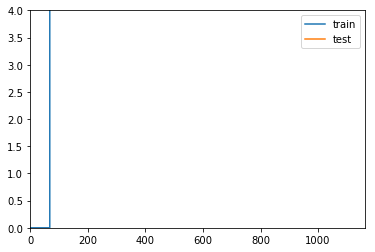

In [335]:
plot_learning_curve(reg, X_train_new, X_test_new, y_train_new, y_test_new)